# Project 2


## Civic Data Analysis
#### Exploratory Data Analysis (EDA)

---

##### Hypothetical Business Case

A mayor created a new data analysis team to provide policy advice. The mayor wants to start a new initiative to move the needle on two separate issues:
- high school education outcomes,
- drug abuse in the community.

##### Datasets
- SAT Scores by State
- Drug Use by Age in the community.

##### Objectives
- Load and Inspect the Data
- Identify patterns
- Visualize data where relevant and informative
- Generate a Data Dictionary for the data
- Generate features
- Pull information from other sources if existing data is deemed inadequate

##### Findings

##### Assumptions

##### Citations

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
# Python Tools
import numpy as np
import scipy.stats as stats
import pandas as pd

# WorkFlow
from pprint import pprint
import csv

# Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## SAT data set

### 1. Load the dataset

In [2]:
pwd

'/home/jovyan/DSI/DSI_Plus_1_Curriculum/project-two/ipynb'

In [3]:
sat_data = '../assets/sat_scores.csv'

### 1A. Load the dataset in as a nested list, convert it to a dictionary, and then convert the dictionary to pandas DataFrame

In [4]:
with open(sat_data) as sat_scores:
    reader = csv.reader(sat_scores)
    scores_list = []
    for row in reader:
        scores_list.append(row)
    pprint (scores_list[:5])

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505']]


In [5]:
len(scores_list)

53

The keys will be the header names, "State", "Rate", "Verbal", and "Math" with the values as each of the corresponding values

In [6]:
scores_dict = {}

# create the dictionary keys
for i in range(len(scores_list[0])):
    scores_dict[scores_list[0][i]] = []

In [7]:
# create the dictionary keys
i = 1
while i <= len(scores_list[1:]):
    scores_dict['State'].append(scores_list[i][0])
    scores_dict['Rate'].append(scores_list[i][1])
    scores_dict['Verbal'].append(scores_list[i][2])
    scores_dict['Math'].append(scores_list[i][3])
    i += 1

In [8]:
# convert the dictionary into a pandas DataFrame
scores_dict_df = pd.DataFrame(scores_dict, columns=['State', 'Rate', 'Verbal', 'Math'])
scores_dict_df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


Confirm that all 52 states were captured in the pandas DataFrame

In [9]:
scores_dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null object
Verbal    52 non-null object
Math      52 non-null object
dtypes: object(4)
memory usage: 1.7+ KB


Notice that all of the data types are represented as 'object' which means the numeric data is not stored as integer types. Therefore, all numeric types should be cleaned and converted to integers.

In [10]:
scores_dict_df['Rate'] = [float(rate) for rate in scores_dict_df['Rate']]
scores_dict_df['Verbal'] = [float(verbal) for verbal in scores_dict_df['Verbal']]
scores_dict_df['Math'] = [float(math) for math in scores_dict_df['Math']]

In [11]:
scores_dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null float64
Verbal    52 non-null float64
Math      52 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


### 1B. Load the dataset directly into a pandas DataFrame

In [12]:
sat_scores_df = pd.read_csv('../assets/sat_scores.csv')
sat_scores_df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516



## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes my data. 
This will contain the name of each variable (column), the type of the variable, my description of each variable, and the shape (rows and columns) of the entire dataset.

In [13]:
scores_list_obj = []
scores_dict_obj = {}

In [14]:
features = [col for col in sat_scores_df]
scores_list_obj.append(features)
scores_list_obj

[['State', 'Rate', 'Verbal', 'Math']]

In [15]:
Types = [type(sat_scores_df[col][0]) for col in sat_scores_df]
scores_list_obj.append(Types)
scores_list_obj

Types_dict ={}
Types_dict['Math'] = type(sat_scores_df['Math'][0])
Types_dict['Rate'] = type(sat_scores_df['Rate'][0])
Types_dict['State'] = type(sat_scores_df['State'][0])
Types_dict['Verbal'] = type(sat_scores_df['Verbal'][0])

Types_dict

{'Math': numpy.int64, 'Rate': numpy.int64, 'State': str, 'Verbal': numpy.int64}

In [16]:
feature_descr = ['where SAt was administered', 
               '% of total students taking SAT', 
               'score for Verbal section', 
               'score for Math section']
scores_list_obj.append(feature_descr)
scores_list_obj

[['State', 'Rate', 'Verbal', 'Math'],
 [str, numpy.int64, numpy.int64, numpy.int64],
 ['where SAt was administered',
  '% of total students taking SAT',
  'score for Verbal section',
  'score for Math section']]

In [17]:
descr_dict = {}

descr_dict['Math'] = scores_list_obj[2][3]
descr_dict['Verbal'] = scores_list_obj[2][2]
descr_dict['Rate'] = scores_list_obj[2][1]
descr_dict['State'] = scores_list_obj[2][0]

In [18]:
df_shape = sat_scores_df.shape

In [19]:
scores_dict_obj['Variables'] = features
scores_dict_obj['Types'] = Types_dict
scores_dict_obj['Shape'] = df_shape
scores_dict_obj['Descriptions'] = feature_descr

pprint (scores_dict_obj)

{'Descriptions': ['where SAt was administered',
                  '% of total students taking SAT',
                  'score for Verbal section',
                  'score for Math section'],
 'Shape': (52, 4),
 'Types': {'Math': <class 'numpy.int64'>,
           'Rate': <class 'numpy.int64'>,
           'State': <class 'str'>,
           'Verbal': <class 'numpy.int64'>},
 'Variables': ['State', 'Rate', 'Verbal', 'Math']}


## 3. Inspect the dataset

*Assumption:* The SAT scores are out of a total 1600 points, 800 for Math and 800 for Verbal. The Rate information is unclear. After some online research, the only assumption I was able to draw is it is the rate that measures the percentage of students in each state that sat for the exam.

### 3A. Inspect the SAT Rates

In [20]:
sat_scores_df['Rate'].describe()

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

Observations:
- The standard deviation is nearly the same size as the mean (27 vs. 37) compared to a total count of 52 data points and a scale of 0-100. This suggests that the Rate is not normally distributed and is possibly skewed.
- The max of 82 lies about 72% of 1 standard deviation away from the 75% percentile of 63. This suggests that there may possibly be outliers in the dataset.
- If the data is in fact skewed, the mode might be a better measure than the mean.

In [21]:
stats.mode(sat_scores_df['Rate'])

ModeResult(mode=array([4]), count=array([3]))

3 out of 52 occurences, the Rate = 4. 
We have a limited dataset here.
Stretch goals include subsequently getting additional data to compare or better infer how 'Rate' data should be interpreted/understood.

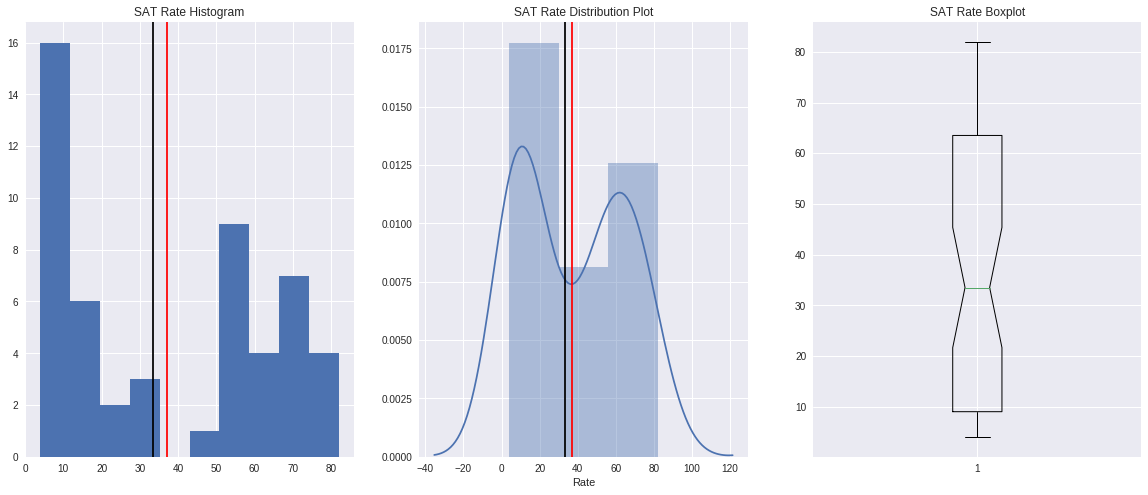

In [22]:
plt.figure(1, figsize=(20, 8))

plt.subplot(131)
_ = sat_scores_df['Rate'].hist()
plt.axvline(sat_scores_df['Rate'].mean(), c='red')
plt.axvline(sat_scores_df['Rate'].median(), c='black')
plt.title('SAT Rate Histogram')

plt.subplot(132)
_ = sns.distplot(sat_scores_df['Rate'])
plt.axvline(sat_scores_df['Rate'].mean(), c='red')
plt.axvline(sat_scores_df['Rate'].median(), c='black')
plt.title('SAT Rate Distribution Plot')

plt.subplot(133)
_ = plt.boxplot(sat_scores_df['Rate'], notch=True, vert=True, showfliers=True)
#_ = sns.boxplot(sat_scores_df['Rate'])
plt.title('SAT Rate Boxplot')

plt.show()

The histogram and distribution plot above suggests that there is bimodal distribution. Additionally the boxplot suggests that most of the Rate data points fall between in an approximate range of ~8 or 9 to ~62 or 63. 

### 3A. Inspect the SAT Scores

Complete the same analysis for each the verbal scores and the math scores.

In [23]:
!pip install display --quiet

In [24]:
display(sat_scores_df['Math'].describe())
display(sat_scores_df['Verbal'].describe())

count     52.000000
mean     531.500000
std       36.014975
min      439.000000
25%      504.000000
50%      521.000000
75%      555.750000
max      603.000000
Name: Math, dtype: float64

count     52.000000
mean     532.019231
std       33.236225
min      482.000000
25%      501.000000
50%      526.500000
75%      562.000000
max      593.000000
Name: Verbal, dtype: float64

In [25]:
display(stats.mode(sat_scores_df['Math']))
display(stats.mode(sat_scores_df['Verbal']))

ModeResult(mode=array([499]), count=array([6]))

ModeResult(mode=array([562]), count=array([3]))

Visualize the Math data and the Verbal data

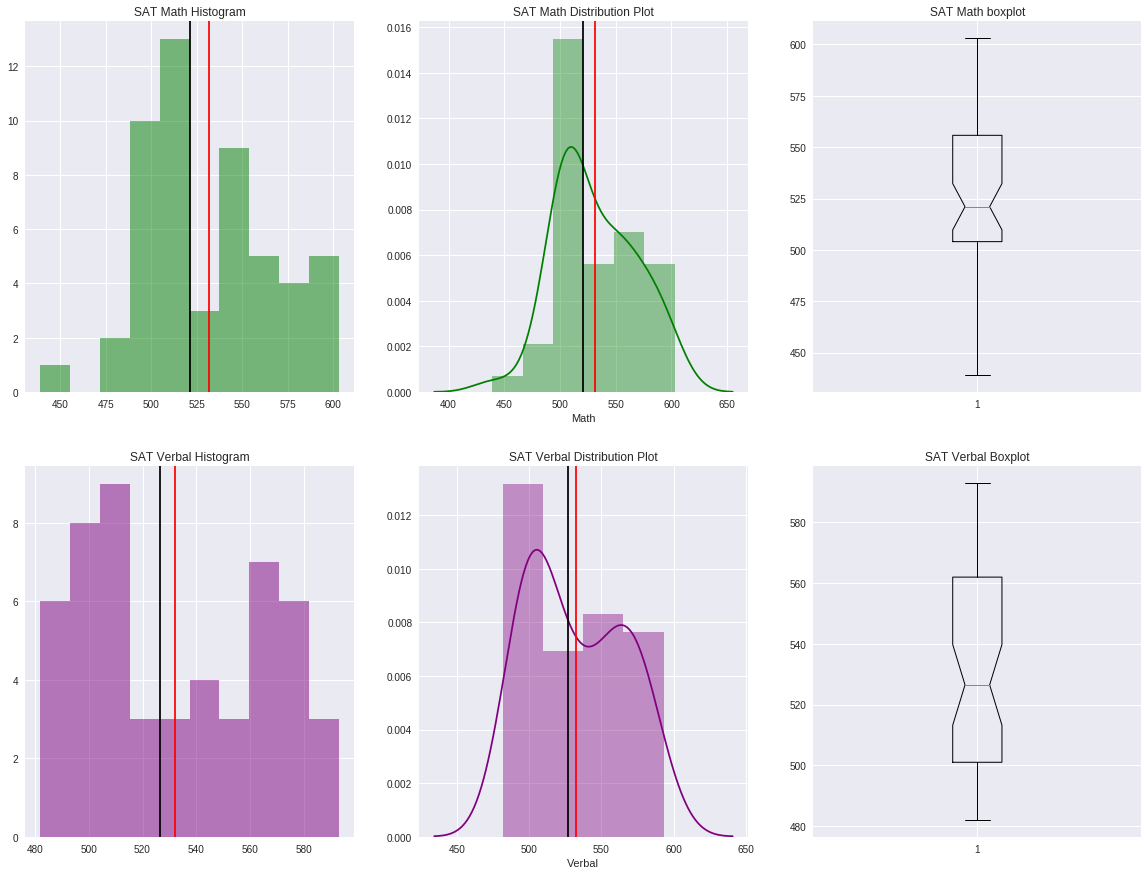

In [26]:
plt.figure(1, figsize=(20, 15))

plt.subplot(231)
_ = sat_scores_df['Math'].hist(color='green', alpha=0.5)
plt.axvline(sat_scores_df['Math'].mean(), color='red')
plt.axvline(sat_scores_df['Math'].median(), color='black')
plt.title('SAT Math Histogram')

plt.subplot(232)
_ = sns.distplot(sat_scores_df['Math'], color='green')
plt.axvline(sat_scores_df['Math'].mean(), color='red')
plt.axvline(sat_scores_df['Math'].median(), color='black')
plt.title('SAT Math Distribution Plot')

plt.subplot(233)
_ = plt.boxplot(sat_scores_df['Math'], notch=True, vert=True, showfliers=True)
plt.title('SAT Math boxplot')

plt.subplot(234)
_ = sat_scores_df['Verbal'].hist(color='purple', alpha = 0.5)
plt.axvline(sat_scores_df['Verbal'].mean(), color='red')
plt.axvline(sat_scores_df['Verbal'].median(), color='black')
plt.title('SAT Verbal Histogram')

plt.subplot(235)
_ = sns.distplot(sat_scores_df['Verbal'], color='purple')
plt.axvline(sat_scores_df['Verbal'].mean(), color='red')
plt.axvline(sat_scores_df['Verbal'].median(), color='black')
plt.title('SAT Verbal Distribution Plot')

plt.subplot(236)
_ = plt.boxplot(sat_scores_df['Verbal'], notch=True, vert=True, showfliers=True)
plt.title('SAT Verbal Boxplot')


plt.show()

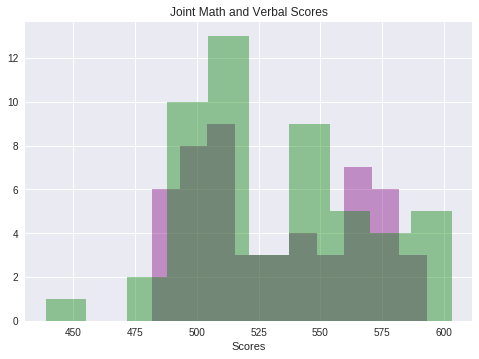

In [27]:
_ = sns.distplot(sat_scores_df['Verbal'], color = 'purple', kde=False, bins=10)
_ = sns.distplot(sat_scores_df['Math'], color = 'green', kde=False, bins = 10)
plt.title('Joint Math and Verbal Scores')
plt.xlabel('Scores')
plt.show()

The above joint distribution illustrates scores (measured by frequency on the y-axis) for both the Verbal (purple) and Math (green).

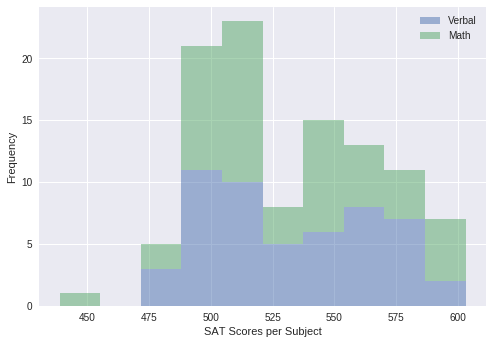

In [28]:
verbal_math_df = sat_scores_df[['Verbal', 'Math']]
_ = verbal_math_df.plot.hist(stacked=True, alpha=0.5, bins=10)
plt.xlabel('SAT Scores per Subject')
plt.show()

### 3B. Inspect all Numeric Data

There is no total score shown, so I will generate a new feature that sums the Verbal and Math scores so a Total score is information we can have for each of the states.

In [29]:
sat_scores_df['Total'] = sat_scores_df['Verbal']+sat_scores_df['Math']
sat_scores_df.head()

,State,Rate,Verbal,Math,Total
0,CT,82,509,510,1019
1,NJ,81,499,513,1012
2,MA,79,511,515,1026
3,NY,77,495,505,1000
4,NH,72,520,516,1036


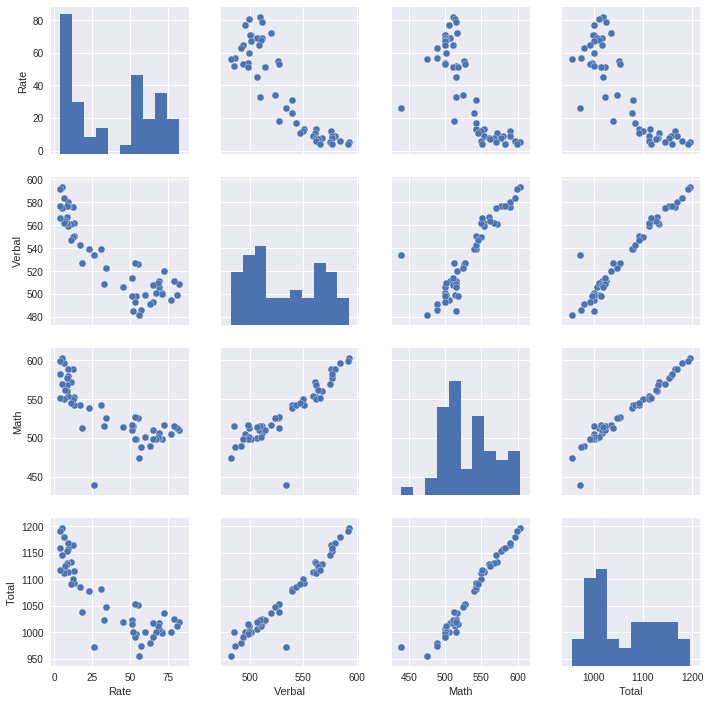

In [30]:
_ = sns.pairplot(sat_scores_df)

**Observations:**
- Math and Verbal scores increase proportionately. As Math scores increase, so do Verbal scores. The converse is also true. This indicates that most students taking the exam tend to do well in both subjects and there is not an inverse relationship between the two subjects.
- As the Rate increases, Math scores tend to be lower to the 500-560 range. This shows the average Math scores decreasing as the percentage of SAT exams taken increase.
- As the Rate increases, verbal scores thend to be lower in the 400-520 range. This shows the average Verbal scores decreasing as the percentage of SAT exams taken increase. The same observation is true of Total scores.

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


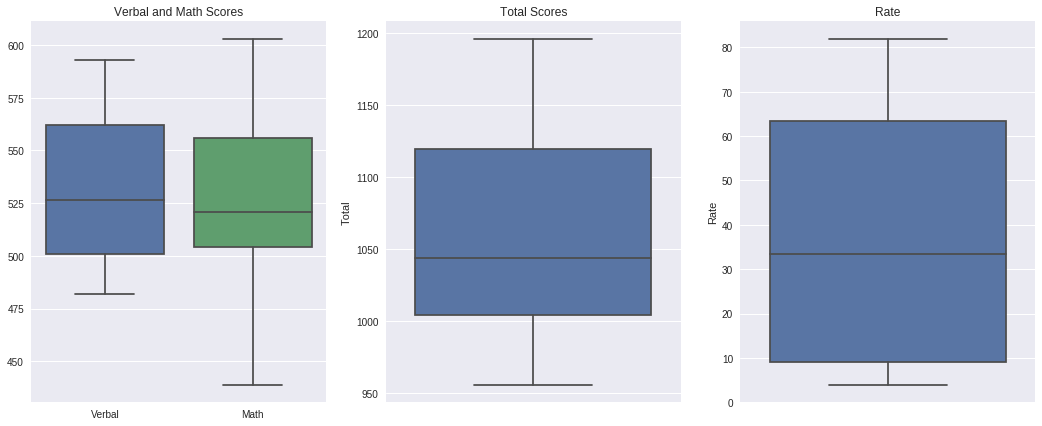

In [38]:
plt.figure(1, figsize=(18, 7))

plt.subplot(131)
_ = sns.boxplot(sat_scores_df[['Verbal', 'Math']])
plt.title('Verbal and Math Scores')

plt.subplot(132)
_ = sns.boxplot(sat_scores_df['Total'], orient='v')
plt.title('Total Scores')

plt.subplot(133)
_ = sns.boxplot(sat_scores_df['Rate'], orient='v')
plt.title('Rate')

plt.show()

*Boxplot Benefits*
- The benefit of using a boxplot is it can provide some information about skewness of the data (by looking at the symmetry of the boxplot).
- The boxplot will also reveal any outliers to the extent any exist.
- The boxplot reveals quartiles as well, marked by the ends of the box.
- The median is marked by the line in the box.

*Boxplot vs. Histogram*
- A histogram does not reveal outliers, median values, or quartiles well.

*Boxplots vs. Scatter Plots*
- While scatter plots do sometimes reveal outliers, it does not show quartiles, nor does it reveal median values. Further, it does not tell anything about skewness of the data.

*Issue w/ putting Rate and Total Score on the same boxplot as Math & Verbal*
- Rate is not measured the same way Verbal and Math are. Each Verbal and Math scores are out of 800 total, therefore they would have the same y-axis. However, since rate is a percentile, (0-100) it would not make sense to have Rate share the same boxplot as the test scores. THe same applies oto the Total Score.

## 4. Interpreting the Data

In [55]:
verbal_abv_avg = sat_scores_df[sat_scores_df['Verbal'] > sat_scores_df['Verbal'].mean()][['State', 'Verbal']]
verbal_abv_avg.sort_values(by = 'Verbal', ascending=False)

,State,Verbal
47,IA,593
49,ND,592
44,WI,584
37,MN,580
48,SD,577
38,KS,577
42,MO,577
33,IL,576
46,UT,575
41,OK,567


In [58]:
math_abv_avg = sat_scores_df[sat_scores_df['Math'] > sat_scores_df['Math'].mean()][['State', 'Math']]
math_abv_avg.sort_values(by='Math', ascending=False)

,State,Math
47,IA,603
49,ND,599
44,WI,596
33,IL,589
37,MN,589
48,SD,582
38,KS,580
42,MO,577
36,MI,572
46,UT,570


In [61]:
total_abv_avg = sat_scores_df[sat_scores_df['Total'] > sat_scores_df['Total'].mean()][['State', 'Total']]
total_abv_avg.sort_values(by='Total', ascending=False)

,State,Total
47,IA,1196
49,ND,1191
44,WI,1180
37,MN,1169
33,IL,1165
48,SD,1159
38,KS,1157
42,MO,1154
46,UT,1145
36,MI,1133


### If the data were to be put into a model, it would need to be scaled (`sklearn.preprocessing.StandardScaler`) and normalized by the standard deviation for each of the data points (Verbal, Math, and Total). 

In [39]:
from sklearn.preprocessing import StandardScaler

In [43]:
standscal = StandardScaler()

In [45]:
sat_scores_sc = standscal.fit_transform(sat_scores_df[['Verbal', 'Math', 'Total']])

In [49]:
sat_scores_sc_df = pd.DataFrame(sat_scores_sc, columns=['Verbal', 'Math', 'Total'])
sat_scores_sc_df.head()

,Verbal,Math,Total
0,-0.699352,-0.602798,-0.665996
1,-1.003164,-0.518687,-0.770714
2,-0.638589,-0.462613,-0.561278
3,-1.124689,-0.742984,-0.950231
4,-0.365159,-0.434575,-0.411680


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [31]:
above_avg_verb = scores_pd_df[scores_pd_df['Verbal'] > scores_pd_df['Verbal'].mean()][['State', 'Verbal']].sort_values(by=['Verbal'], ascending=False)
above_avg_verb[:5]

,State,Verbal
47,IA,593
49,ND,592
44,WI,584
37,MN,580
48,SD,577


In [32]:
above_avg_verb['State'].nunique()

24

# **ANSWER**
There are 24 states that are above the mean.
This tells me of the total 52 states, if 24 states are above the mean that there is likely a normal distribution of verbal scores across all 52 states. 



### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [33]:
above_med_verb = scores_pd_df[scores_pd_df['Verbal'] > scores_pd_df['Verbal'].median()][['State', 'Verbal']].sort_values(by=['Verbal'], ascending=False)
above_med_verb[:5]

,State,Verbal
47,IA,593
49,ND,592
44,WI,584
37,MN,580
38,KS,577



# **ANSWER**
This tells me the mean and median are close in value, therefore there is not much skewness in the distribution of the Verbal score. This means that the data tends to be in the center. 



### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [34]:
scores_pd_df.shape

(52, 4)

In [35]:
vm_score_diff = np.array(scores_pd_df['Verbal'] - scores_pd_df['Math'])

In [36]:
scores_pd_df['Verb-Math'] = vm_score_diff

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [37]:
VM_descending = scores_pd_df.sort_values(by='Verb-Math', ascending=False)   

In [38]:
VM_Rank = []

i = 1
while i <= len(VM_descending):
    VM_Rank.append(i)
    i +=1

VM_descending['VM Rank'] = np.array(VM_Rank)
top10_vmdiff = VM_descending[:10]
top10_vmdiff[:3]

,State,Rate,Verbal,Math,Verb-Math,VM Rank
27,OH,26,534,439,95,1
50,MS,4,566,551,15,2
29,WV,18,527,512,15,3


In [39]:
mv_diff = scores_pd_df['Math'] - scores_pd_df['Verbal']
scores_pd_df['Math-Verb'] = mv_diff
MV_descending = scores_pd_df.sort_values(by='Math-Verb', ascending=False)

MV_Rank = []
i=1
while i <= len(MV_descending):
    MV_Rank.append(i)
    i += 1

MV_descending['MV Rank'] = MV_Rank
MV_descending = MV_descending.drop('Verb-Math', axis=1)
MV_descending.head()

top10_mvdiff = MV_descending[:10]
top10_mvdiff[:3]

,State,Rate,Verbal,Math,Math-Verb,MV Rank
21,HI,52,485,515,30,1
23,CA,51,498,517,19,2
1,NJ,81,499,513,14,3


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [40]:
MV_descending.sample(5)
#already excludes 'State'

,State,Rate,Verbal,Math,Math-Verb,MV Rank
36,MI,11,561,572,11,6
29,WV,18,527,512,-15,51
11,MD,65,508,510,2,20
48,SD,4,577,582,5,16
21,HI,52,485,515,30,1


In [41]:
MV_descending.corr()

,Rate,Verbal,Math,Math-Verb,MV Rank
Rate,1.000000,-0.886432,-0.773746,0.101412,-0.066394
Verbal,-0.886432,1.000000,0.899871,-0.052600,0.010997
Math,-0.773746,0.899871,1.000000,0.388219,-0.289269
Math-Verb,0.101412,-0.052600,0.388219,1.000000,-0.685541
MV Rank,-0.066394,0.010997,-0.289269,-0.685541,1.000000


**ANSWER**
The correlation coefficient matrix will return values between 0 and 1, with values being closer to 1 indicating how closely related two given variables are in the matrix. 

In [42]:
df_Merged_SAT = MV_descending.merge(VM_descending, on=['State', 'Rate', 'Verbal', 'Math'], how='left')

In [43]:
df_Merged_SAT.head()

,State,Rate,Verbal,Math,Math-Verb,MV Rank,Verb-Math,VM Rank
0,HI,52,485,515,30,1,-30,52
1,CA,51,498,517,19,2,-19,51
2,NJ,81,499,513,14,3,-14,50
3,IL,12,576,589,13,4,-13,49
4,WI,6,584,596,12,5,-12,48


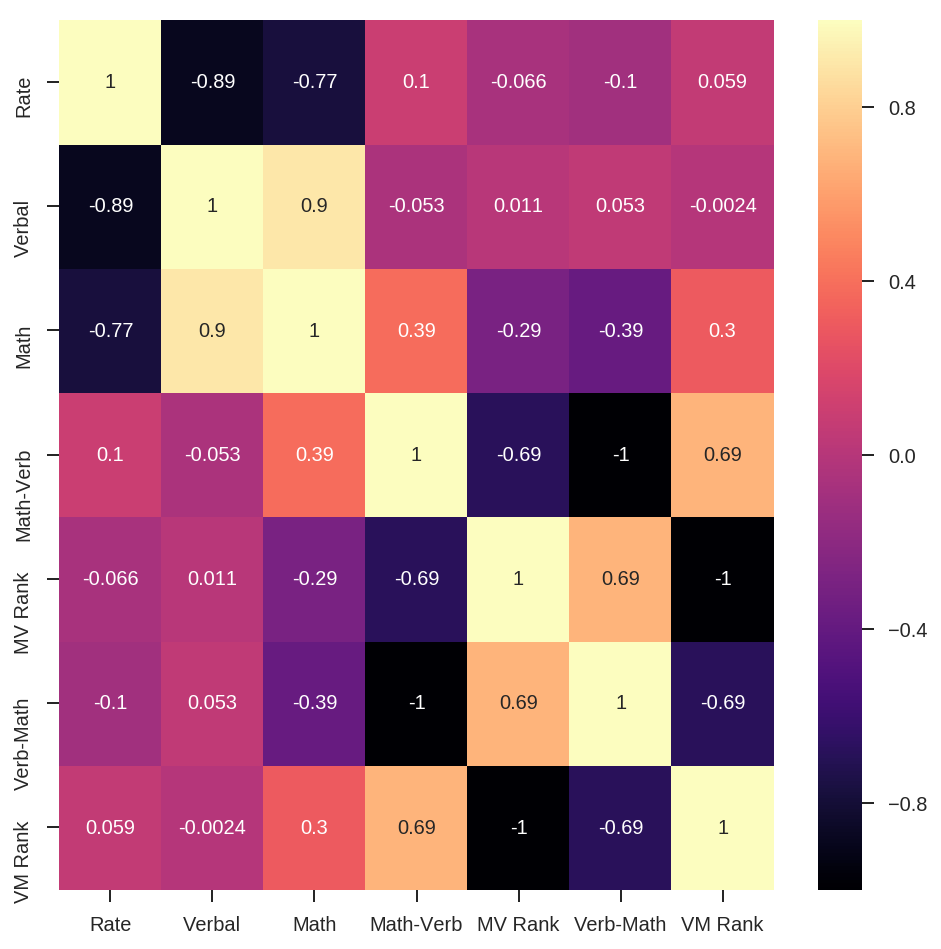

In [44]:
sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(8, 8)
sns.heatmap(data=df_Merged_SAT.corr(), annot=True, ax=ax, cmap='magma')    
plt.show()

# **Some observations**
- Math-Verb reflects the Math Scores minus Verbal scores, which is negatively correlated with Verb-Math (Verbal Scores minus Math scores). This is not super valuable information because we know that they are negatively correlated. 
- It is is interesting to note that the VM rankings (where the rank is 1 for the largest Verb-Math difference) are negatively correlatated to Verb-Math values. But this also makes sense since the values of the VM Rank is a lower value for a larger difference.
- There is a strong correlation between Math Scores and Verbal Scores. 

- For some of the columns that show a strong negative or positive correlation, it may be worth further exploring the data. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [45]:
df_Merged_SAT.describe()

,Rate,Verbal,Math,Math-Verb,MV Rank,Verb-Math,VM Rank
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,-0.519231,26.500000,0.519231,26.500000
std,27.301788,33.236225,36.014975,15.729939,15.154757,15.729939,15.154757
min,4.000000,482.000000,439.000000,-95.000000,1.000000,-30.000000,1.000000
25%,9.000000,501.000000,504.000000,-4.250000,13.750000,-6.000000,13.750000
50%,33.500000,526.500000,521.000000,0.000000,26.500000,0.000000,26.500000
75%,63.500000,562.000000,555.750000,6.000000,39.250000,4.250000,39.250000
max,82.000000,593.000000,603.000000,30.000000,52.000000,95.000000,52.000000


# **ANSWER**
- Count : indicates the number of values in the respective columns
- Mean : shows the average of all the values for each of the respective columns
- Std : reflects the standard deviation for the values in each of the respective columns
- Min : reflects the smallest value for a given column
- 25% : reflects the 25th percentile value. This means that 25% of the values for a given column are less than the value reflected here.
- 50% : same explanation as 25%, except it applies to the 50th percentile.
- 75% : same explanation as 25%, except it applies to the 75th percentile.
- Max : reflects the largest value for a given columm

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [46]:
df_Merged_SAT.cov()

,Rate,Verbal,Math,Math-Verb,MV Rank,Verb-Math,VM Rank
Rate,745.387632,-804.355958,-760.803922,43.552036,-27.470588,-43.552036,24.470588
Verbal,-804.355958,1104.646682,1077.147059,-27.499623,5.539216,27.499623,-1.186275
Math,-760.803922,1077.147059,1297.078431,219.931373,-157.882353,-219.931373,162.235294
Math-Verb,43.552036,-27.499623,219.931373,247.430995,-163.421569,-247.430995,163.421569
MV Rank,-27.470588,5.539216,-157.882353,-163.421569,229.666667,163.421569,-228.901961
Verb-Math,-43.552036,27.499623,-219.931373,-247.430995,163.421569,247.430995,-163.421569
VM Rank,24.470588,-1.186275,162.235294,163.421569,-228.901961,-163.421569,229.666667


# **ANSWER**

1) Describe how the covariance matrix is different from the correlation matrix.
- The covariance measures how much the y values vary given the x values
- The correlation measures is standardized based on each x and y's standard deviation; therefore the correlation is bound by -1 and 1 whereas the covariance can whipsaw across all numbers. 


2) What is the process to convert the covariance into correlation?
- the correlation is the covariance of x and y **divided by** the quantity of the standard deviation of x multiplied by the standard deviation of y. Correlation is standardizing the data points by the product of the standard deviation of each x and y. I did not visualize (heatmap) the covariance because covariance values are not bound by -1 and 1. The covariances could carry large negative or large positive values. Therefore visualizing it on a heatmap would not be value-add. 


3) Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?
- The correlation is preferred because it is a standardized measurement bound by -1 and 1. If x and y are vastly different data series, then it makes the covariance sometimes difficult to interpret. Correlation of -1 indicates a perfectly negative relationship between x and y, and 0 indicates no relationship exists between x and y. Lastly, a correlation of 1 indicates a perfectly positive relationship between x and y. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [47]:
%matplotlib inline

In [48]:
drug_use = './drug-use-by-age.csv'
drugs_pd_df = pd.read_csv(drug_use)

In [49]:
drugs_pd_df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [50]:
drugs_pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [51]:
clean_drugs_df = drugs_pd_df.iloc[:, 1:].apply(pd.to_numeric, errors = 'coerce')
# to replace the '-' with Nan 
clean_drugs_df

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,0.1,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,0.1,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [52]:
clean_drugs_df['age'] = drugs_pd_df['age']
# notably, I'm not converting the age to a float or int type because I want to keep the integrity of the age ranges
# reattach the age column to the dataframe clean drugs df

In [53]:
clean_drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-frequency        16 non-null float64
tranqu

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [54]:
# pick 2 things and sns.jointplot to firm up my hypothesis

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [56]:
clean_drugs_df.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,17.000000,...,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,0.352941,...,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,0.333762,...,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,0.100000,...,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,0.600000,...,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


**OBSERVATIONS from .describe()** 
- The data is inbalanced. The number of observations for each age group is not equal. Furthermore, if this data were modeled, it would return biased outcomes. The training set to start would be off-base (a GIGO scenario) due to inbalanced data. Furthermore, there's likely some skew in the drug categories since the values in the drug frequencies reflect median number of times a certain drug was used in the last 12 months for the sample size in a given age group. 

In [57]:
no_n_df = clean_drugs_df.drop(['n'], axis=1)

In [58]:
drugs_cov = no_n_df.cov()
drugs_cov

,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
alcohol-use,722.473456,514.513971,191.003015,454.289338,37.770110,56.591667,5.560184,84.153297,6.078971,568.791250,...,9.632647,-18.487500,34.676691,-169.944853,22.030074,-64.970221,4.820551,224.716905,1.180551,60.909926
alcohol-frequency,514.513971,454.492647,66.347426,320.522059,22.371324,67.591667,3.945956,119.607143,3.886397,556.181250,...,3.261765,32.904167,16.766544,-101.619485,8.755882,477.101103,2.381618,167.861905,0.087868,106.637868
marijuana-use,191.003015,66.347426,143.035662,135.195221,19.203088,-25.139167,1.750147,-89.565110,2.840551,-38.808125,...,7.068493,-47.267083,19.611103,-55.187132,16.298309,-400.128676,2.735441,4.942619,1.017941,-82.312684
marijuana-frequency,454.289338,320.522059,135.195221,337.183824,24.773529,37.983333,3.862132,32.208791,3.872059,338.927083,...,6.808456,9.875000,24.737868,-124.735294,14.507353,-109.647059,3.205147,164.607143,1.011397,22.242647
cocaine-use,37.770110,22.371324,19.203088,24.773529,3.300662,-2.351667,0.357978,-10.304945,0.545699,7.374792,...,0.956507,-1.717500,2.932022,-6.153493,2.362941,-48.308824,0.424559,2.405714,0.115809,-7.218566
cocaine-frequency,56.591667,67.591667,-25.139167,37.983333,-2.351667,64.616667,0.465000,135.798077,-0.550000,86.190476,...,-1.284167,-24.358333,-2.580833,-13.662500,-3.778333,39.745833,-0.382500,45.752381,-0.123333,159.370833
crack-use,5.560184,3.945956,1.750147,3.862132,0.357978,0.465000,0.055588,0.659341,0.059081,4.842917,...,0.086471,0.165833,0.319412,-0.936029,0.205110,-5.964706,0.043015,2.001190,0.014265,0.536765
crack-frequency,84.153297,119.607143,-89.565110,32.208791,-10.304945,135.798077,0.659341,328.017857,-2.546703,405.128205,...,-5.103846,-46.686813,-11.242857,-21.858516,-12.098352,98.737637,-1.606044,156.141484,-0.135165,303.717033
heroin-use,6.078971,3.886397,2.840551,3.872059,0.545699,-0.550000,0.059081,-2.546703,0.111397,-2.829167,...,0.157390,0.168333,0.479044,-0.672610,0.379632,-7.977022,0.071618,-0.835952,0.015368,-0.196507
heroin-frequency,568.791250,556.181250,-38.808125,338.927083,7.374792,86.190476,4.842917,405.128205,-2.829167,4912.632292,...,-6.286250,31.309524,-3.015417,-160.062500,-13.292292,1271.230208,-2.663333,2050.453297,-1.308125,-357.988542


In [59]:
drugs_corr = no_n_df.corr()
drugs_corr

,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
alcohol-use,1.000000,0.897889,0.594165,0.920425,0.773458,0.254042,0.877378,0.202732,0.677614,0.327330,...,0.589219,-0.052126,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.282820,0.318268,0.091251
alcohol-frequency,0.897889,1.000000,0.260219,0.818769,0.577601,0.391981,0.785050,0.333935,0.546194,0.381874,...,0.251554,0.119852,0.448543,-0.415026,0.291766,0.260304,0.425153,0.253725,0.029867,0.201423
marijuana-use,0.594165,0.260219,1.000000,0.615610,0.883789,-0.273950,0.620670,-0.476095,0.711613,-0.047566,...,0.971733,-0.323519,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.014585,0.616766,-0.277144
marijuana-frequency,0.920425,0.818769,0.615610,1.000000,0.742598,0.250348,0.892077,0.113860,0.631789,0.277175,...,0.609618,0.040880,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.317099,0.399124,0.048777
cocaine-use,0.773458,0.577601,0.883789,0.742598,1.000000,-0.163922,0.835727,-0.339153,0.899944,0.058679,...,0.865626,-0.075193,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.043154,0.461914,-0.159997
cocaine-frequency,0.254042,0.391981,-0.273950,0.250348,-0.163922,1.000000,0.250877,0.875558,-0.206298,0.149018,...,-0.276995,-0.236768,-0.191929,-0.144951,-0.345279,0.817772,-0.189141,0.172758,-0.126690,0.773808
crack-use,0.877378,0.785050,0.620670,0.892077,0.835727,0.250877,1.000000,0.173208,0.750790,0.299661,...,0.603003,0.056195,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.281240,0.438421,0.091676
crack-frequency,0.202732,0.333935,-0.476095,0.113860,-0.339153,0.875558,0.173208,1.000000,-0.417148,0.298192,...,-0.529659,-0.195650,-0.420309,-0.233501,-0.511014,0.903993,-0.395273,0.261224,-0.060603,0.611218
heroin-use,0.677614,0.546194,0.711613,0.631789,0.899944,-0.206298,0.750790,-0.417148,1.000000,-0.121704,...,0.775321,0.039657,0.818583,-0.175464,0.808024,-0.277996,0.816620,-0.078088,0.333649,-0.023708
heroin-frequency,0.327330,0.381874,-0.047566,0.277175,0.058679,0.149018,0.299661,0.298192,-0.121704,1.000000,...,-0.152658,0.039502,-0.025554,-0.202417,-0.136570,0.204941,-0.145718,0.873618,-0.139270,-0.199142


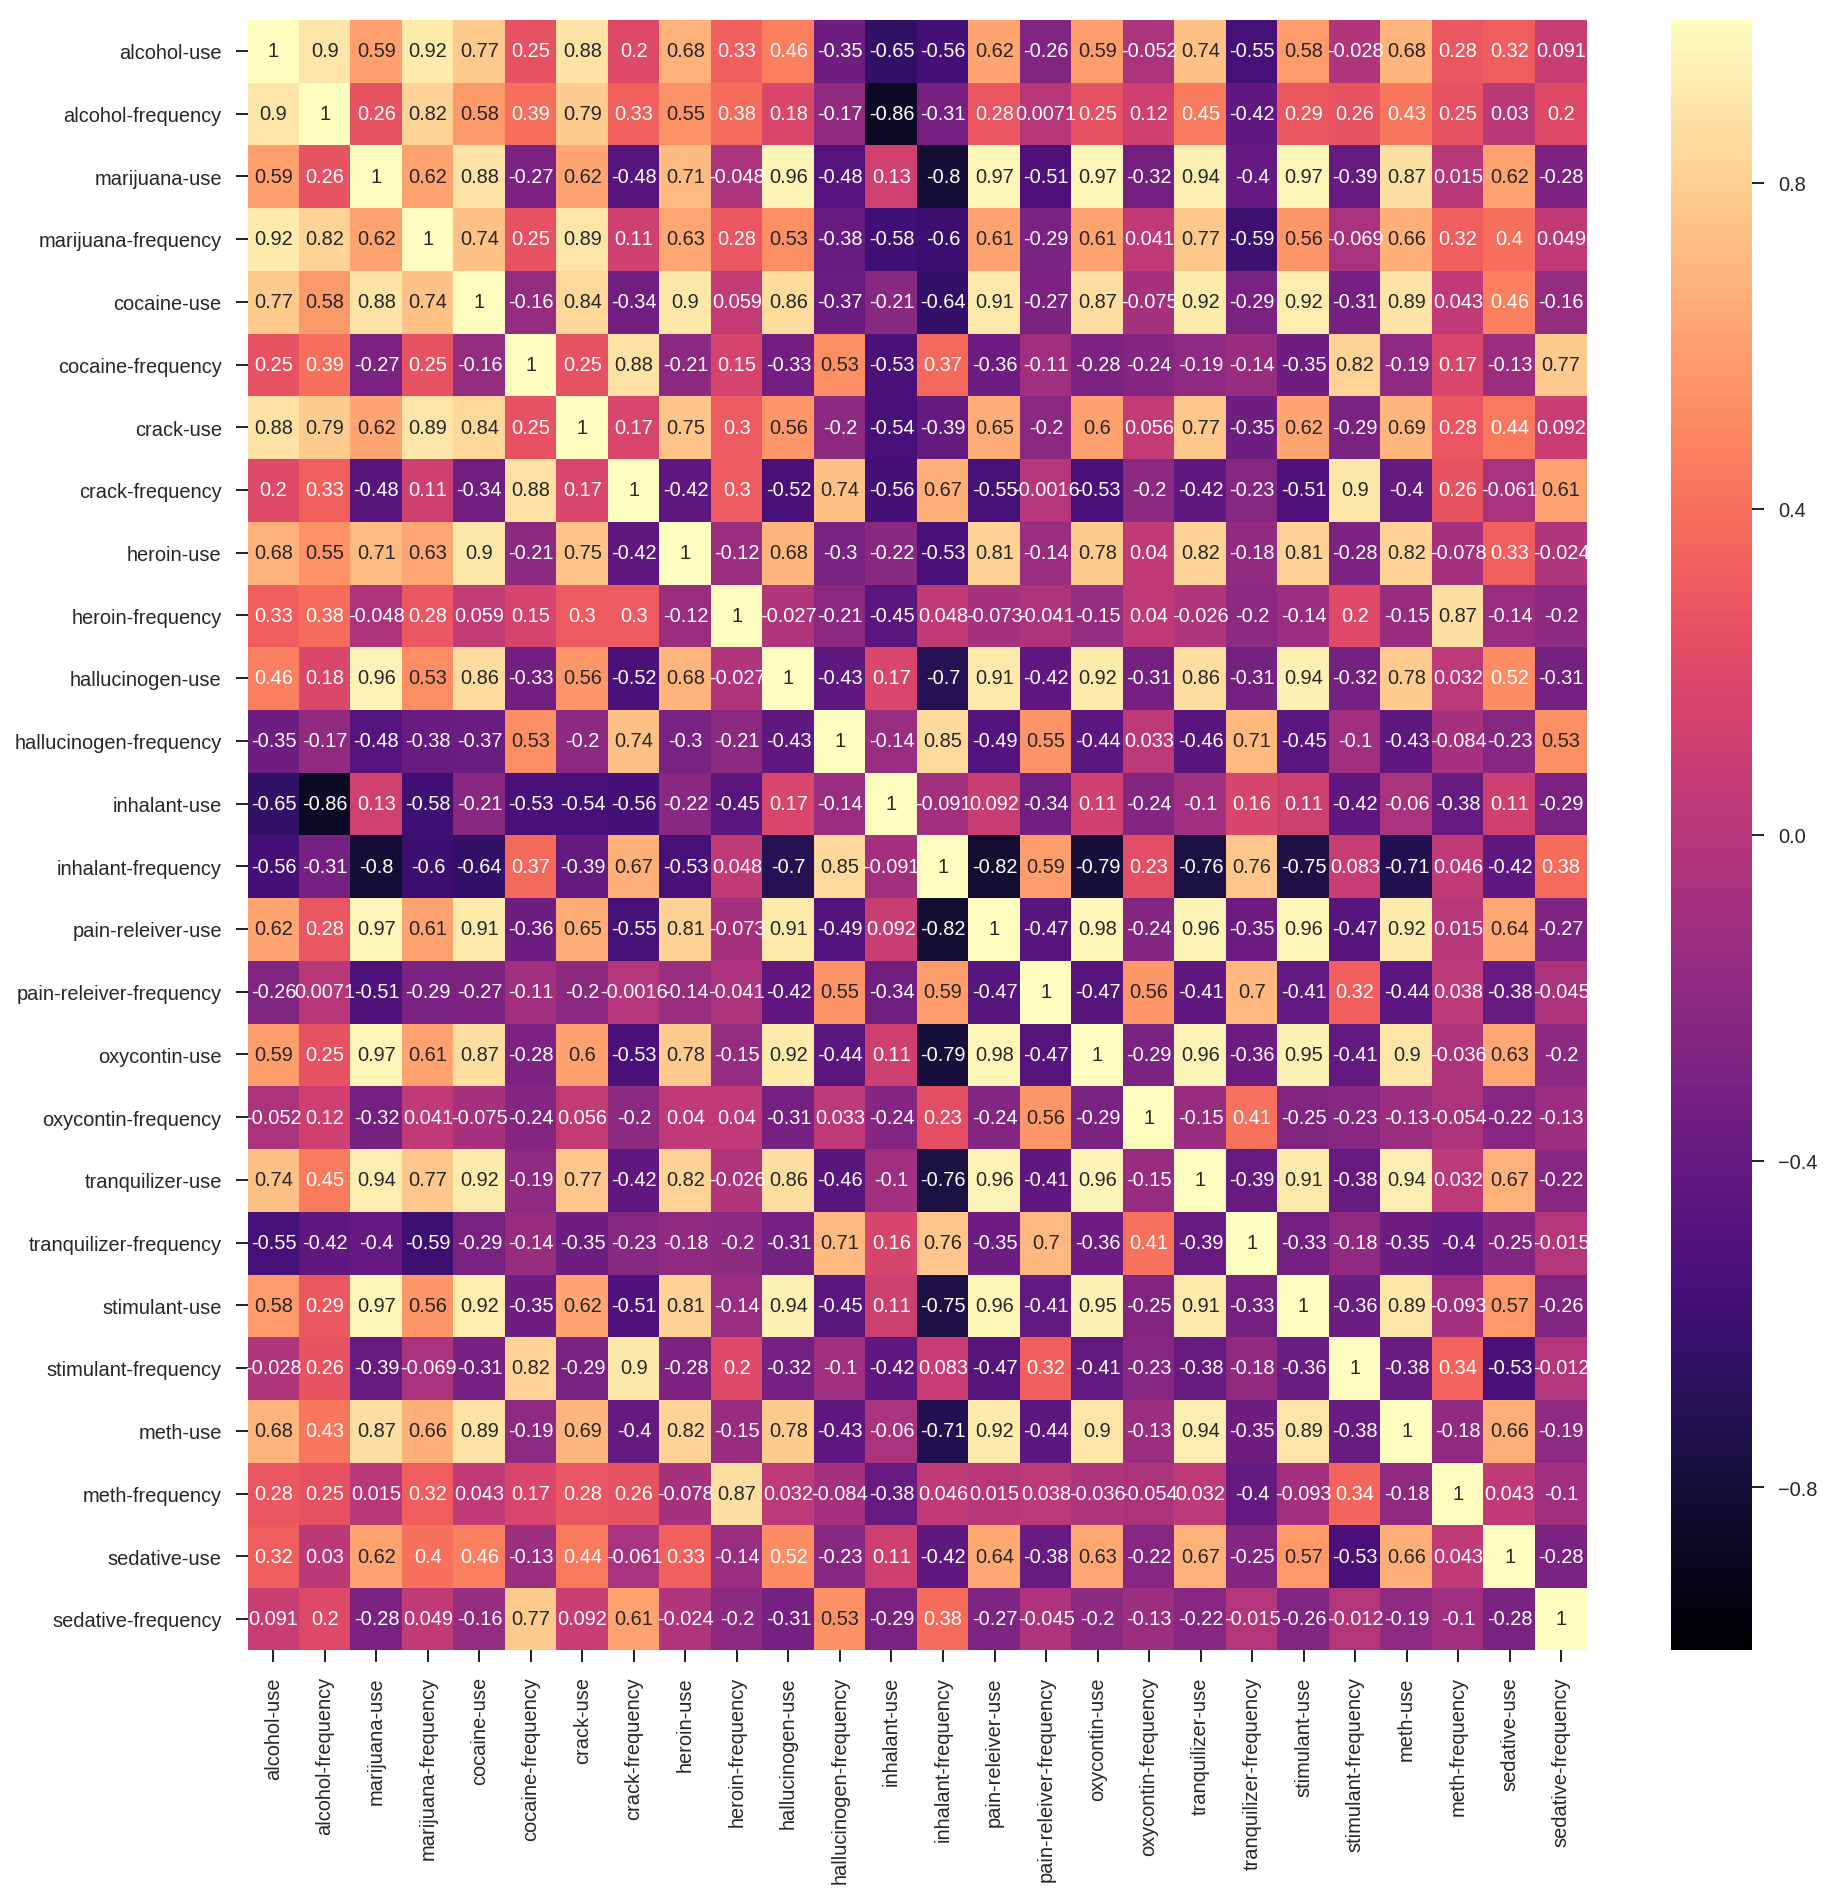

In [60]:
sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(15, 15)
sns.heatmap(data=drugs_corr, annot=True, ax=ax, cmap='magma')    
plt.show()

**NOTE**
- Below, I opted to separate the frequency from the uses in the original data frame to compare 'apples-to-apples' a little better because frequency indicates the median number of times a particular drug was used in the last 12 months based on the sample size n for a particular age/age-group. Use indicates the percentage of individuals that use a particular drug based on the sample size n for a given age/age-group. 

In [61]:
age_dummies = pd.get_dummies(clean_drugs_df, columns=['age'])
age_dummies

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,age_19,age_20,age_21,age_22-23,age_24-25,age_26-29,age_30-34,age_35-49,age_50-64,age_65+
0,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,0.1,...,0,0,0,0,0,0,0,0,0,0
1,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,0.1,...,0,0,0,0,0,0,0,0,0,0
3,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,...,0,0,0,0,0,0,0,0,0,0
4,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,...,0,0,0,0,0,0,0,0,0,0
5,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,...,0,0,0,0,0,0,0,0,0,0
6,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,...,0,0,0,0,0,0,0,0,0,0
7,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,...,1,0,0,0,0,0,0,0,0,0
8,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,...,0,1,0,0,0,0,0,0,0,0
9,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,...,0,0,1,0,0,0,0,0,0,0


In [62]:
age_dummies.columns

Index(['n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency', 'age_12', 'age_13', 'age_14',
       'age_15', 'age_16', 'age_17', 'age_18', 'age_19', 'age_20', 'age_21',
       'age_22-23', 'age_24-25', 'age_26-29', 'age_30-34', 'age_35-49',
       'age_50-64', 'age_65+'],
      dtype='object')

In [63]:
frequency_cols = ['age_12', 'age_13', 'age_14','age_15', 'age_16', 'age_17', 'age_18', 'age_19', 'age_20', 'age_21',
                  'age_22-23', 'age_24-25', 'age_26-29', 'age_30-34', 'age_35-49','age_50-64', 'age_65+', 
                  'alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency', 'hallucinogen-frequency', 
                  'inhalant-frequency', 'pain-releiver-frequency', 'oxycontin-frequency',  'tranquilizer-frequency', 
                  'stimulant-frequency', 'meth-frequency', 'sedative-frequency', 'heroin-frequency']

use_cols = ['age_12', 'age_13', 'age_14','age_15', 'age_16', 'age_17', 'age_18', 'age_19', 'age_20', 'age_21',
            'age_22-23', 'age_24-25', 'age_26-29', 'age_30-34', 'age_35-49', 'age_50-64', 'age_65+', 'alcohol-use', 
            'marijuana-use', 'cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use', 
            'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 
            'sedative-use']

In [64]:
frequency_df = age_dummies[frequency_cols]
frequency_df.head()

,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,...,cocaine-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency,heroin-frequency
0,1,0,0,0,0,0,0,0,0,0,...,5.0,52.0,19.0,36.0,24.5,52.0,2.0,NaN,13.0,35.5
1,0,1,0,0,0,0,0,0,0,0,...,1.0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0,NaN
2,0,0,1,0,0,0,0,0,0,0,...,5.5,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5,2.0
3,0,0,0,1,0,0,0,0,0,0,...,4.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0,1.0
4,0,0,0,0,1,0,0,0,0,0,...,7.0,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0,66.5


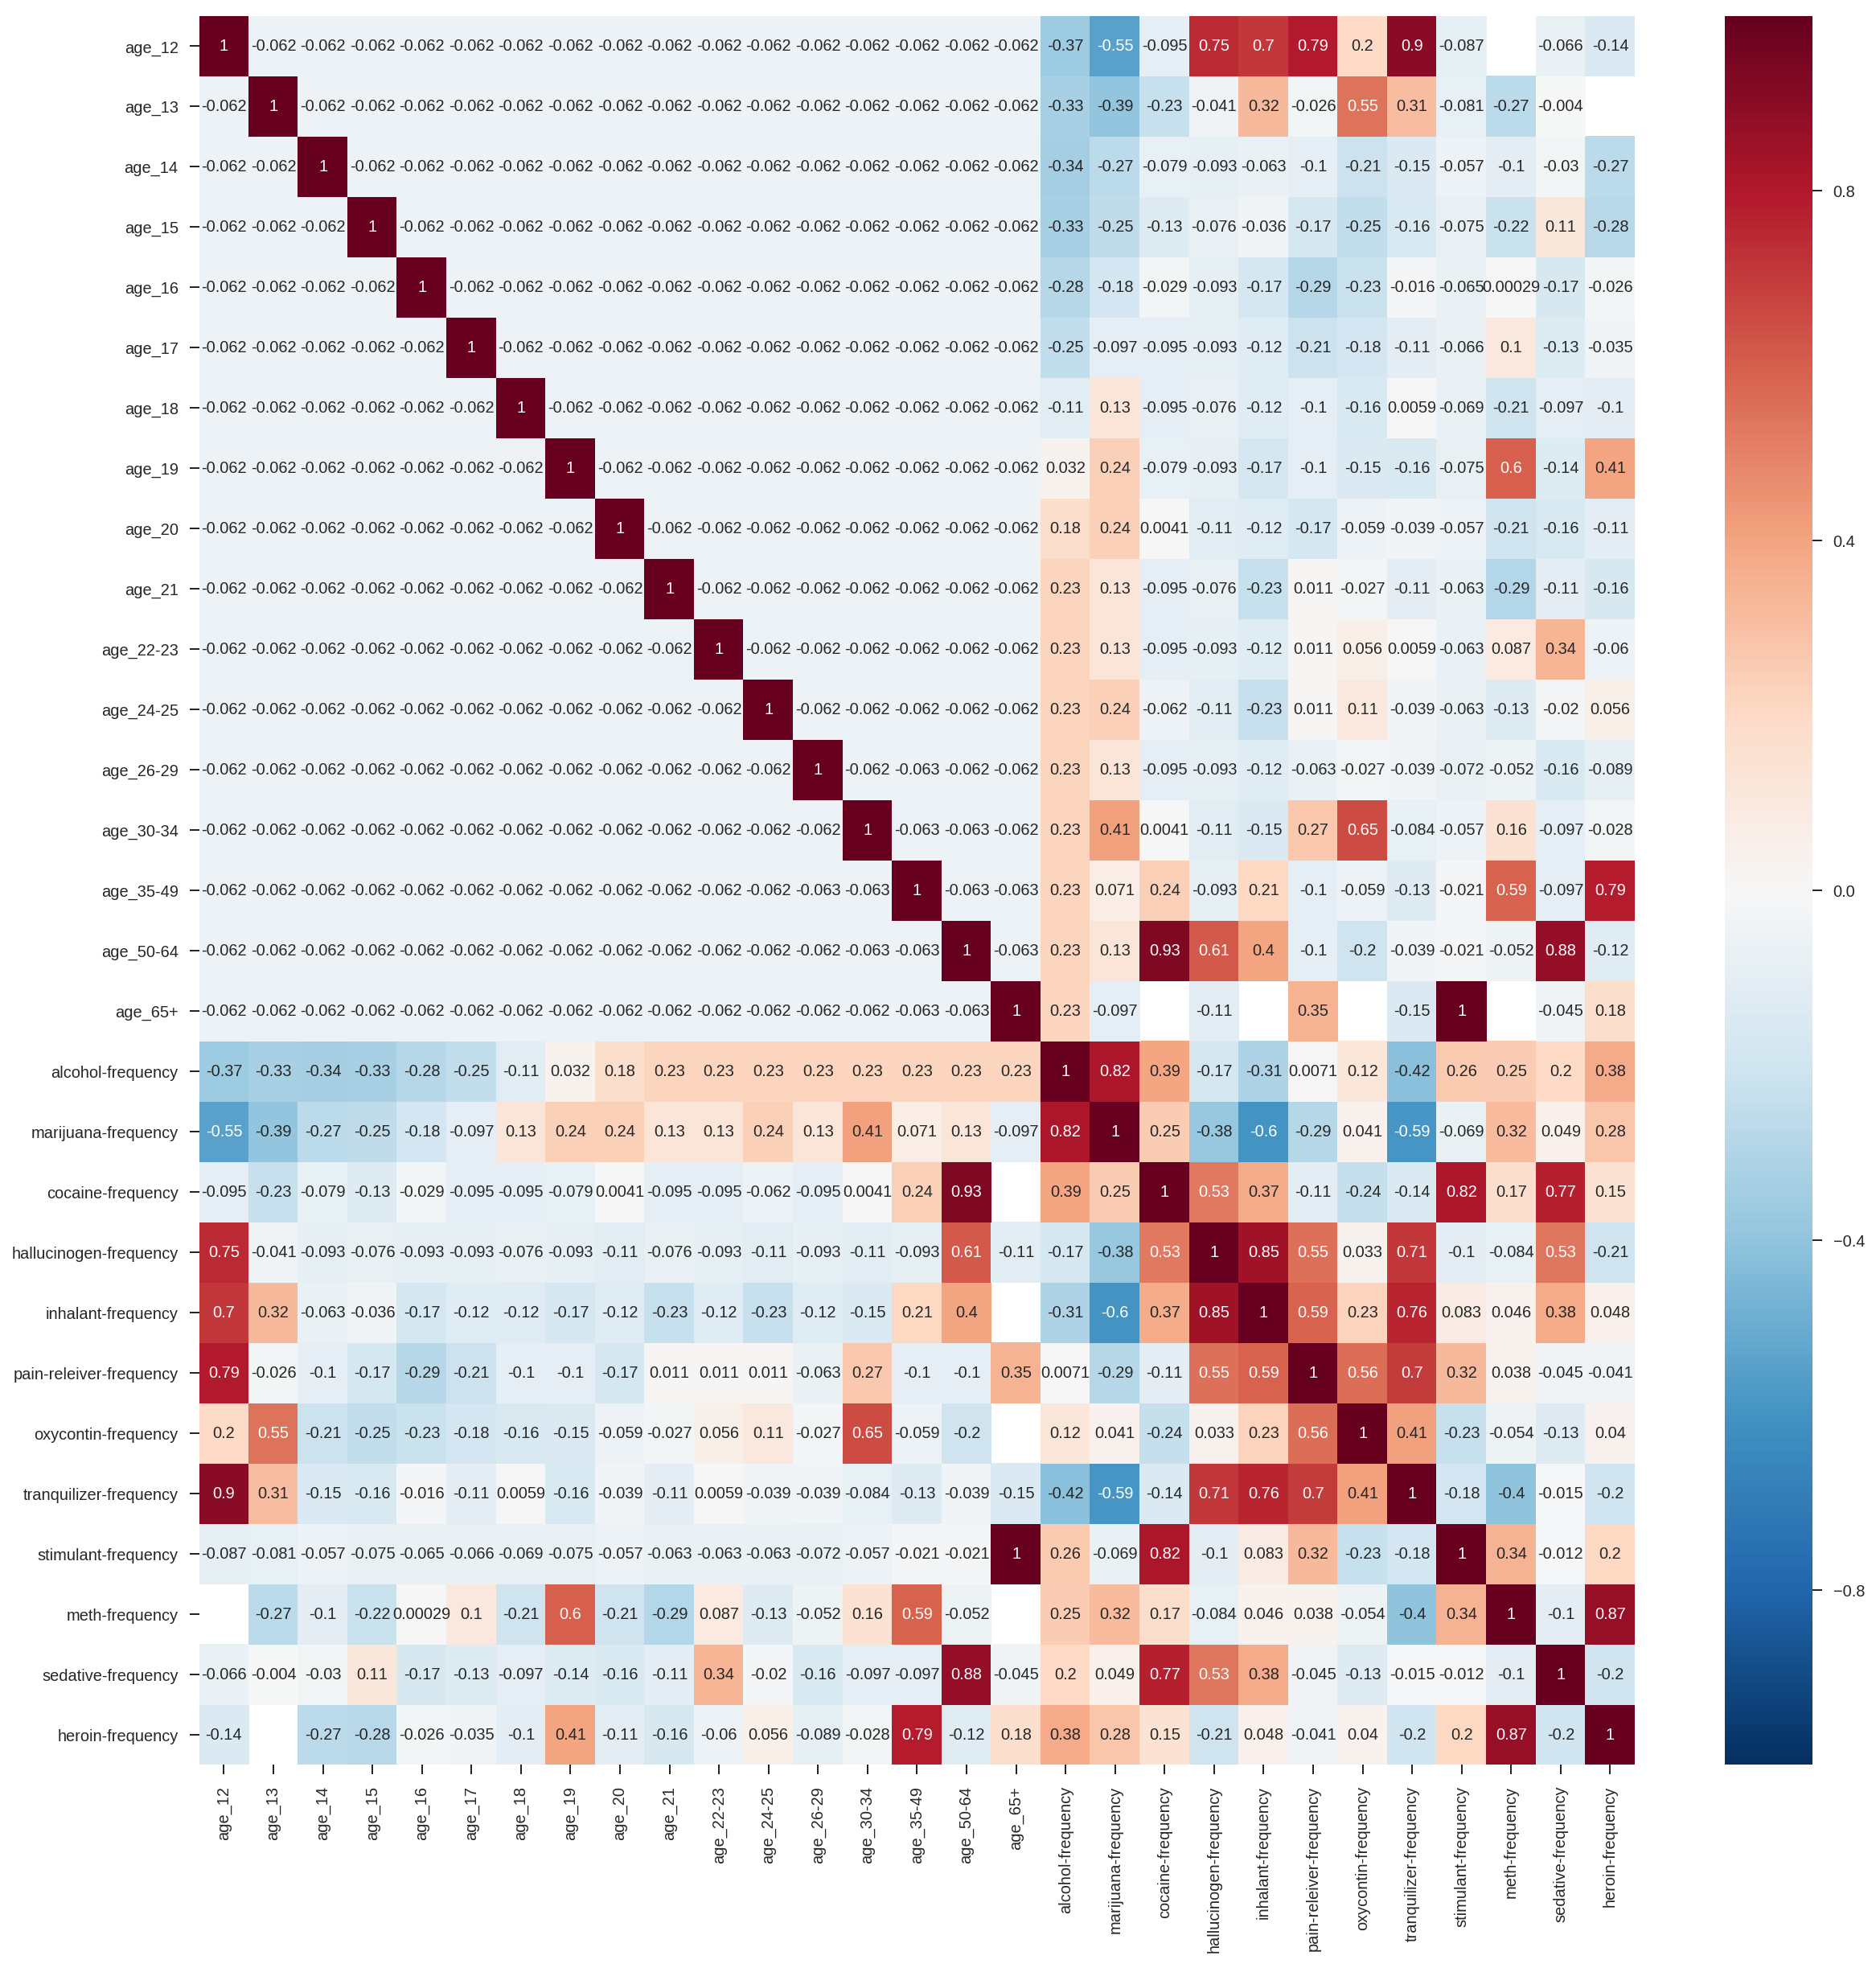

,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,...,cocaine-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency,heroin-frequency
age_12,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.095375,0.748817,0.704667,0.791246,0.201850,0.903421,-0.087364,NaN,-0.066229,-0.143743
age_13,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.228071,-0.041432,0.320615,-0.026229,0.545646,0.308839,-0.081369,-0.267921,-0.003968,NaN
age_14,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.078788,-0.092970,-0.063437,-0.100545,-0.214873,-0.151120,-0.057391,-0.103535,-0.029910,-0.271198
age_15,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.128549,-0.075791,-0.036005,-0.174861,-0.246127,-0.162339,-0.075375,-0.220336,0.110178,-0.275003
age_16,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.029027,-0.092970,-0.173166,-0.286335,-0.225291,-0.016498,-0.064884,0.000288,-0.169997,-0.025800
age_17,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.095375,-0.092970,-0.118302,-0.212019,-0.183619,-0.106246,-0.066383,0.104111,-0.133678,-0.035312
age_18,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,...,-0.095375,-0.075791,-0.118302,-0.100545,-0.162782,0.005939,-0.069380,-0.207358,-0.097359,-0.103795
age_19,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,...,-0.078788,-0.092970,-0.173166,-0.100545,-0.152364,-0.162339,-0.075375,0.597271,-0.138867,0.406025
age_20,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,...,0.004147,-0.110150,-0.118302,-0.174861,-0.058602,-0.038935,-0.057391,-0.207358,-0.159621,-0.107599
age_21,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,...,-0.095375,-0.075791,-0.228031,0.010929,-0.027347,-0.106246,-0.063385,-0.293877,-0.107736,-0.164669


In [65]:
sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(20,20)
sns.heatmap(data=frequency_df.corr(), annot=True, ax=ax)    
plt.show()

frequency_df.corr()

# ** Some relationships worth exploring **
- Alcohol vs. marijuana frequency
- Cocaine vs. sedative frequency. I wouldn't have guessed that an upper and a downer would both be positively correlated. 
- Hallucinogen vs. inhalant frequency. Many inhalants have hallucinogenic affects, for example glue and other solvents, which is more accessible for youth. This may come in handy to address the prompt, which is to recommend some policy changes. Given more data on the information gathering process, one might be able to figure out which inhalants were in question. 
- Inhalant vs. tranquilizer frequency
- Heroin vs. meth frequency

**Age vs. drug frequency correlations**
- Age 12 vs. [tranquilizer, pain reliever, inhalant, and hallucinogen]
- Age 19 vs. meth frequency
- Age 50-64 vs. [sedative and cocaine]
- Age 65+ vs. sedative frequency


**Other Notes**
- Oxycontin vs. Pain Reliever frequency 
- Pain Reliever vs. tranquilizer frequency (tranquilizers are often given for pain relief, however sometimes taking prescription pain relievers w/ tranquilizers can lead to heart problems)
- Stimulant vs. cocaine frequency (cocaine is a type of stimulant).


In [66]:
df_frequency_only = frequency_df.drop(['age_12', 'age_13', 'age_14','age_15', 'age_16', 'age_17', 'age_18', 'age_19', 'age_20', 'age_21',
                  'age_22-23', 'age_24-25', 'age_26-29', 'age_30-34', 'age_35-49','age_50-64', 'age_65+'], axis=1)

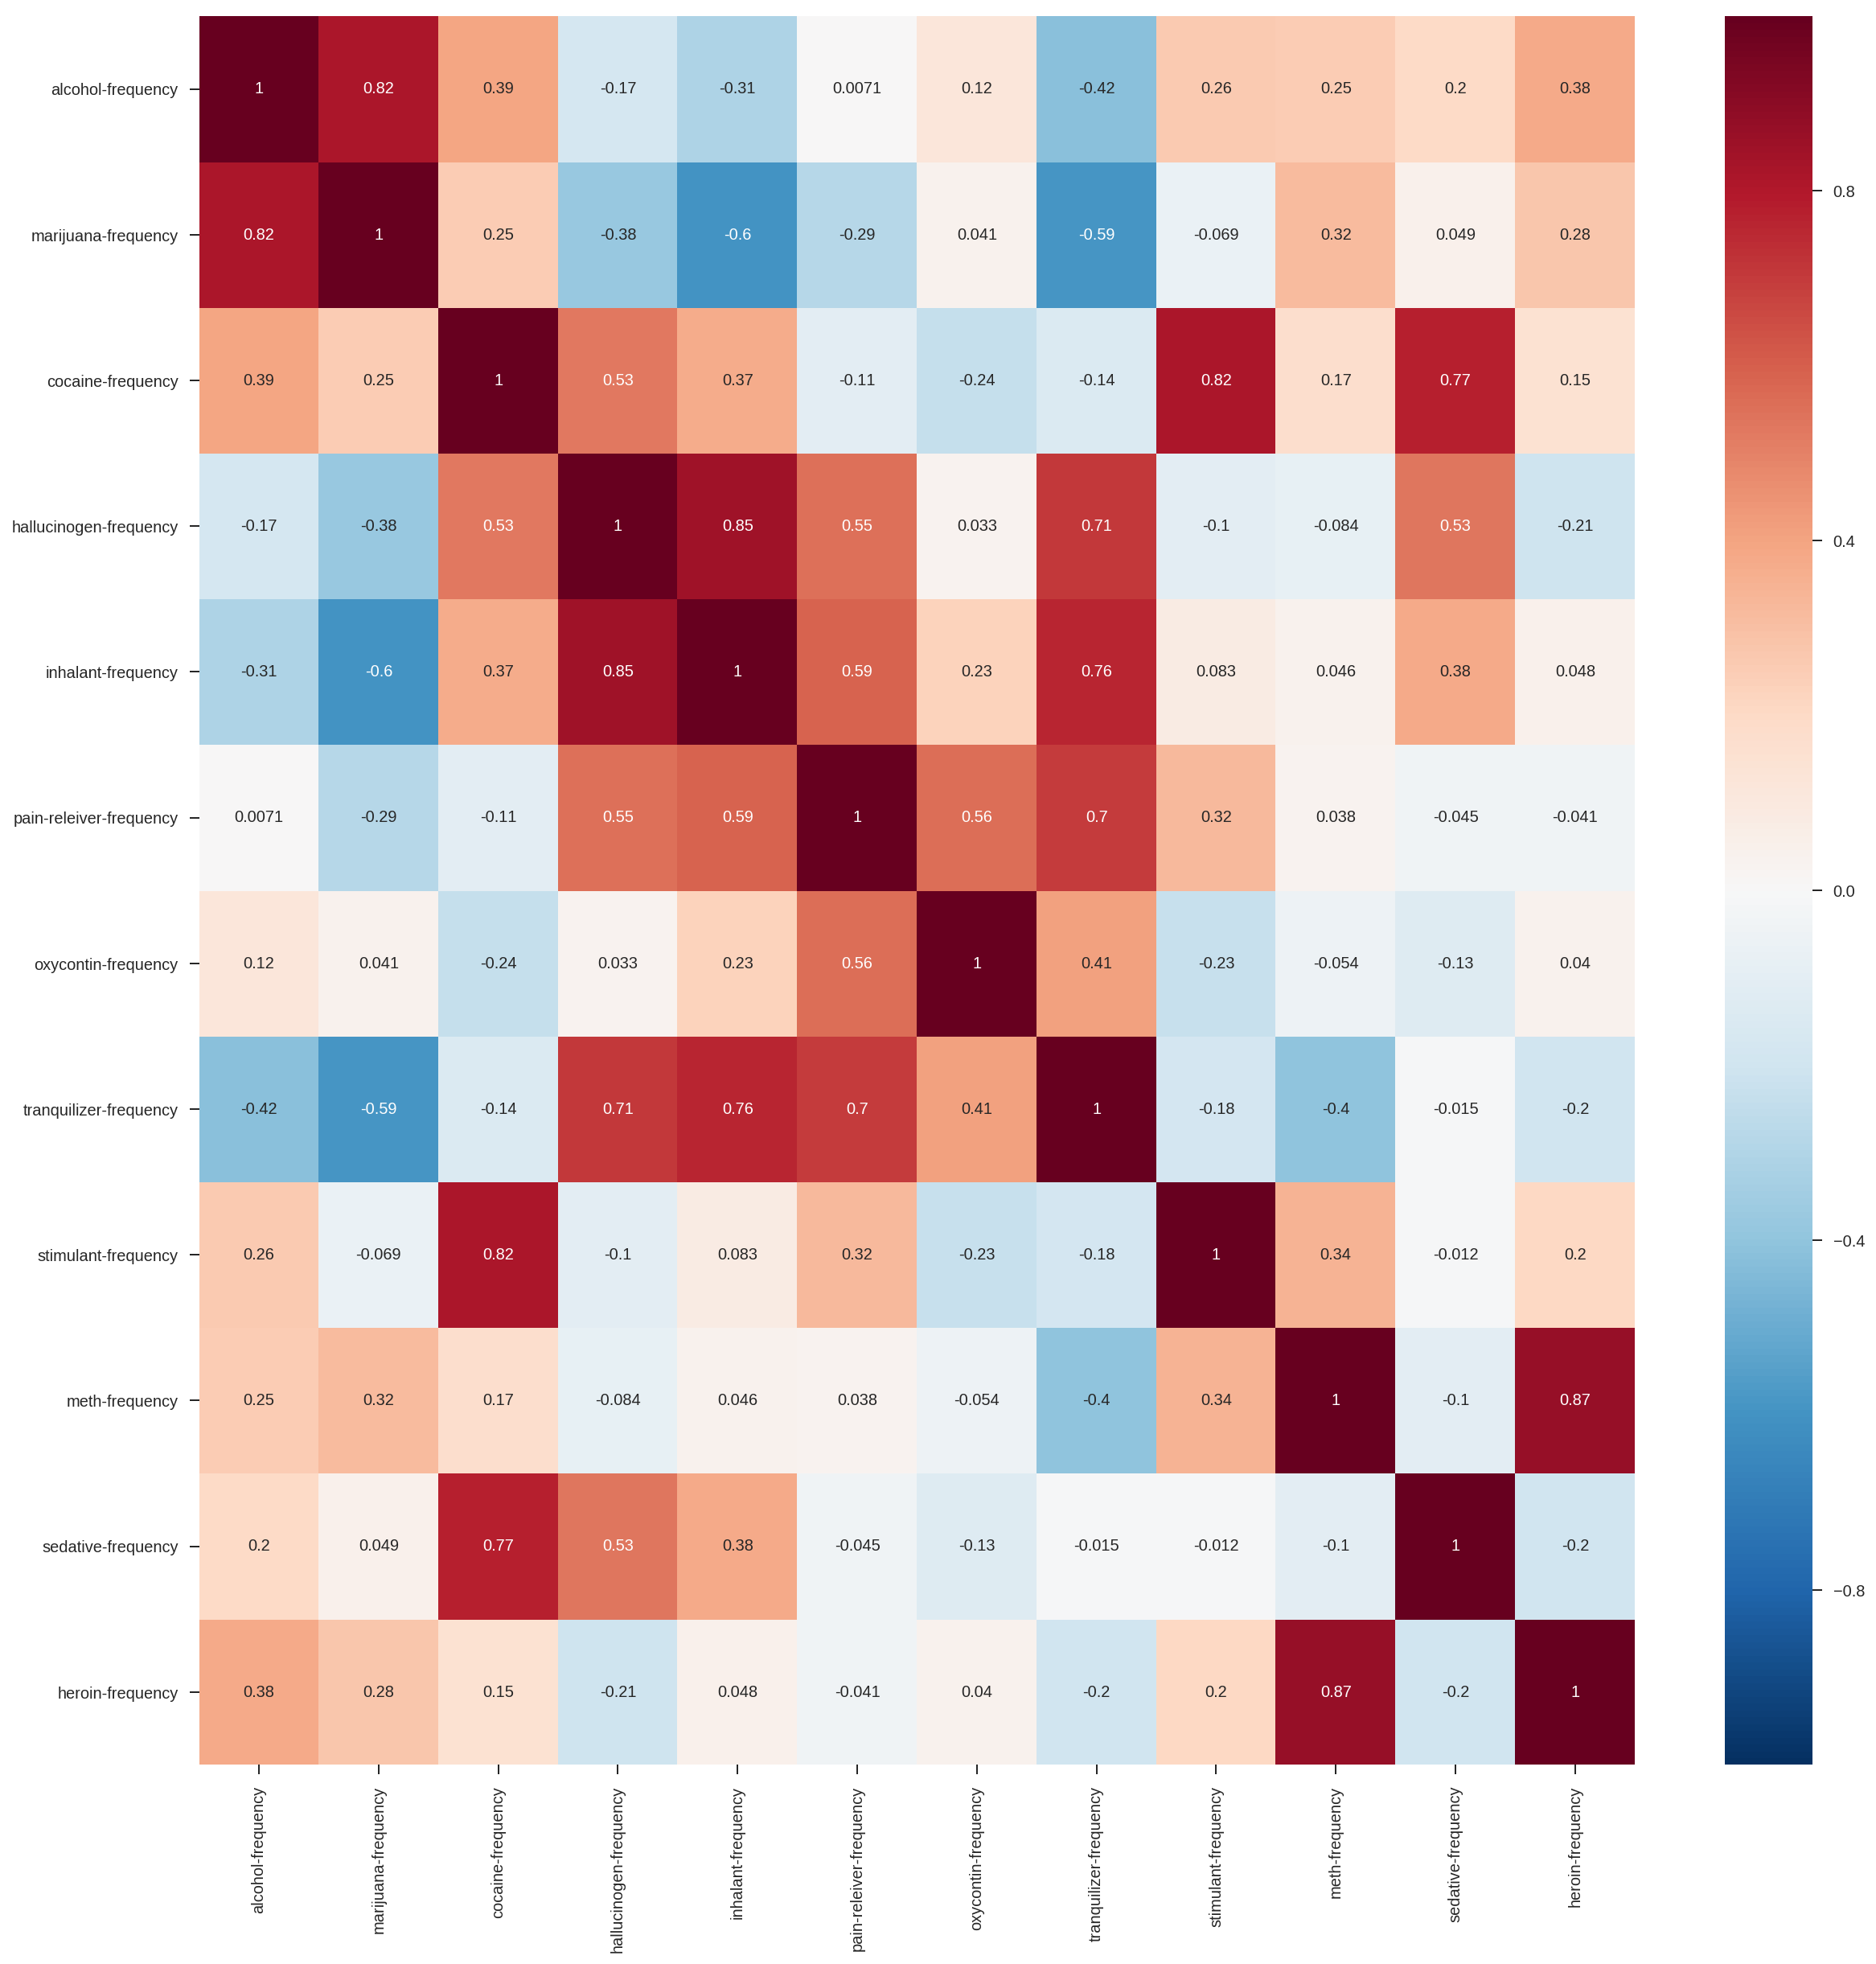

,alcohol-frequency,marijuana-frequency,cocaine-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency,heroin-frequency
alcohol-frequency,1.000000,0.818769,0.391981,-0.174622,-0.305296,0.007087,0.119852,-0.415026,0.260304,0.253725,0.201423,0.381874
marijuana-frequency,0.818769,1.000000,0.250348,-0.380430,-0.598028,-0.285292,0.040880,-0.591449,-0.069454,0.317099,0.048777,0.277175
cocaine-frequency,0.391981,0.250348,1.000000,0.529790,0.369098,-0.107033,-0.236768,-0.144951,0.817772,0.172758,0.773808,0.149018
hallucinogen-frequency,-0.174622,-0.380430,0.529790,1.000000,0.846213,0.547363,0.032624,0.705734,-0.103980,-0.084470,0.533095,-0.205455
inhalant-frequency,-0.305296,-0.598028,0.369098,0.846213,1.000000,0.587035,0.226635,0.764857,0.083121,0.045934,0.380819,0.048409
pain-releiver-frequency,0.007087,-0.285292,-0.107033,0.547363,0.587035,1.000000,0.561735,0.699282,0.324717,0.037693,-0.045213,-0.041496
oxycontin-frequency,0.119852,0.040880,-0.236768,0.032624,0.226635,0.561735,1.000000,0.412133,-0.228278,-0.053704,-0.131597,0.039502
tranquilizer-frequency,-0.415026,-0.591449,-0.144951,0.705734,0.764857,0.699282,0.412133,1.000000,-0.180415,-0.404670,-0.014524,-0.202417
stimulant-frequency,0.260304,-0.069454,0.817772,-0.103980,0.083121,0.324717,-0.228278,-0.180415,1.000000,0.344898,-0.011796,0.204941
meth-frequency,0.253725,0.317099,0.172758,-0.084470,0.045934,0.037693,-0.053704,-0.404670,0.344898,1.000000,-0.103219,0.873618


In [67]:
sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(20,20)
sns.heatmap(data=df_frequency_only.corr(), annot=True, ax=ax)    
plt.show()

df_frequency_only.corr()

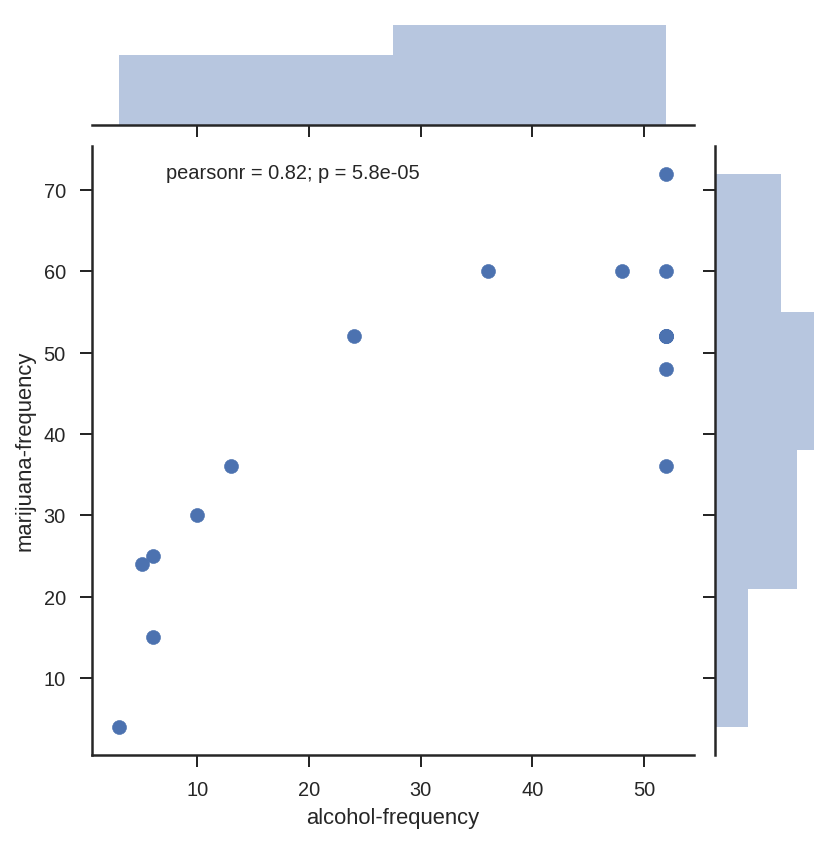

In [68]:
sns.jointplot(x='alcohol-frequency', y='marijuana-frequency', data=frequency_df, kind='scatter')
plt.show()

In [69]:
import scipy.stats as stats

In [70]:
frequency_df['cocaine-frequency'].isnull().sum()

1

In [71]:
cocaine_mean = np.nanmean(frequency_df['cocaine-frequency'], axis=0)
cocaine_mean

7.875

In [72]:
cocaine_median = np.nanmedian(frequency_df['cocaine-frequency'], axis=0)
cocaine_median

5.25

In [73]:
frequency_df['cocaine-frequency'].mask(frequency_df['cocaine-frequency'].isnull(), cocaine_mean)

0      5.000
1      1.000
2      5.500
3      4.000
4      7.000
5      5.000
6      5.000
7      5.500
8      8.000
9      5.000
10     5.000
11     6.000
12     5.000
13     8.000
14    15.000
15    36.000
16     7.875
Name: cocaine-frequency, dtype: float64

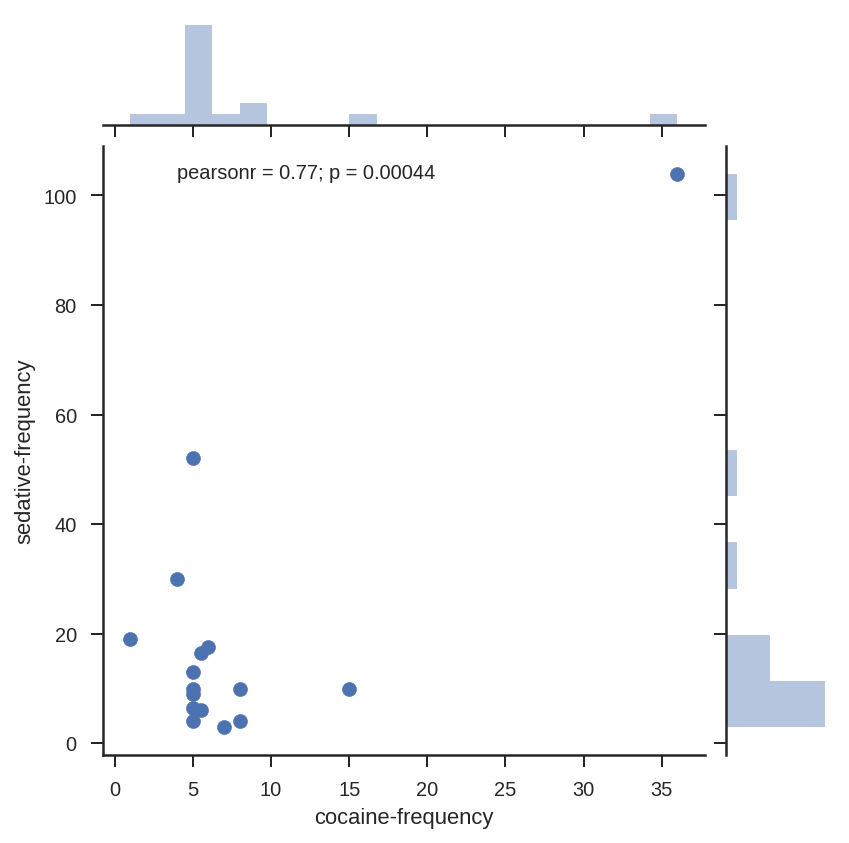

In [74]:
sns.jointplot(x='cocaine-frequency', y='sedative-frequency', data=frequency_df, kind='scatter')
plt.show()

In [75]:
frequency_df['inhalant-frequency'].isnull().sum()

1

In [76]:
inhalant_mean = np.nanmean(frequency_df['inhalant-frequency'], axis=0)
inhalant_mean

6.15625

In [77]:
inhalant_median = np.nanmedian(frequency_df['inhalant-frequency'], axis=0)
inhalant_median

4.0

In [78]:
frequency_df['inhalant-frequency'].mask(frequency_df['inhalant-frequency'].isnull(), inhalant_mean)

0     19.00000
1     12.00000
2      5.00000
3      5.50000
4      3.00000
5      4.00000
6      4.00000
7      3.00000
8      4.00000
9      2.00000
10     4.00000
11     2.00000
12     4.00000
13     3.50000
14    10.00000
15    13.50000
16     6.15625
Name: inhalant-frequency, dtype: float64

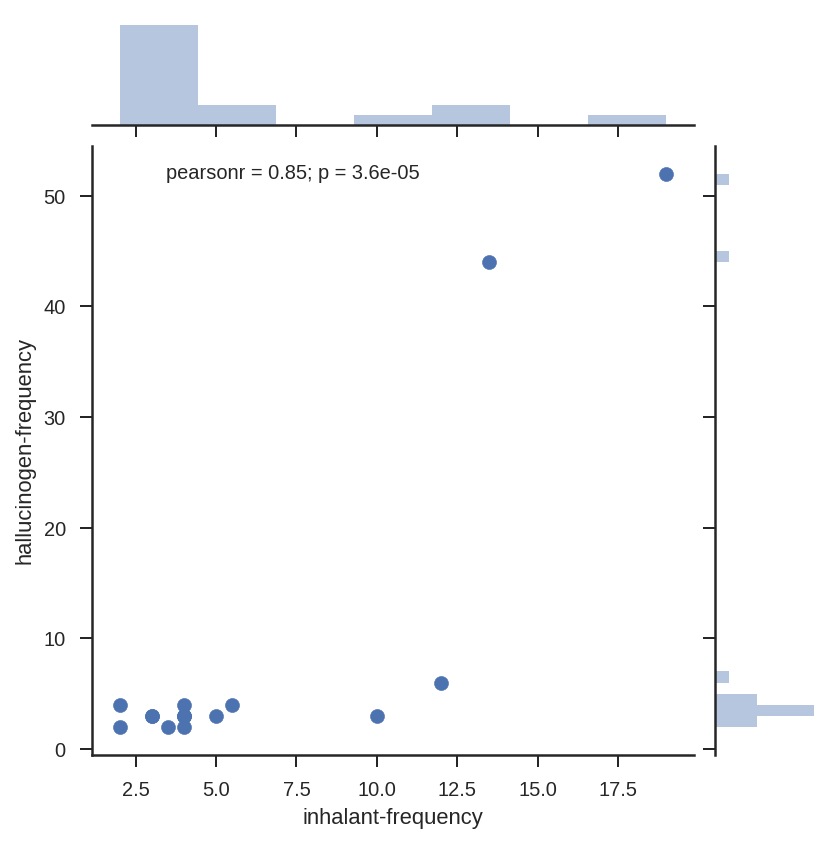

In [79]:
sns.jointplot(x='inhalant-frequency', y='hallucinogen-frequency', data=frequency_df, kind='scatter')
plt.show()

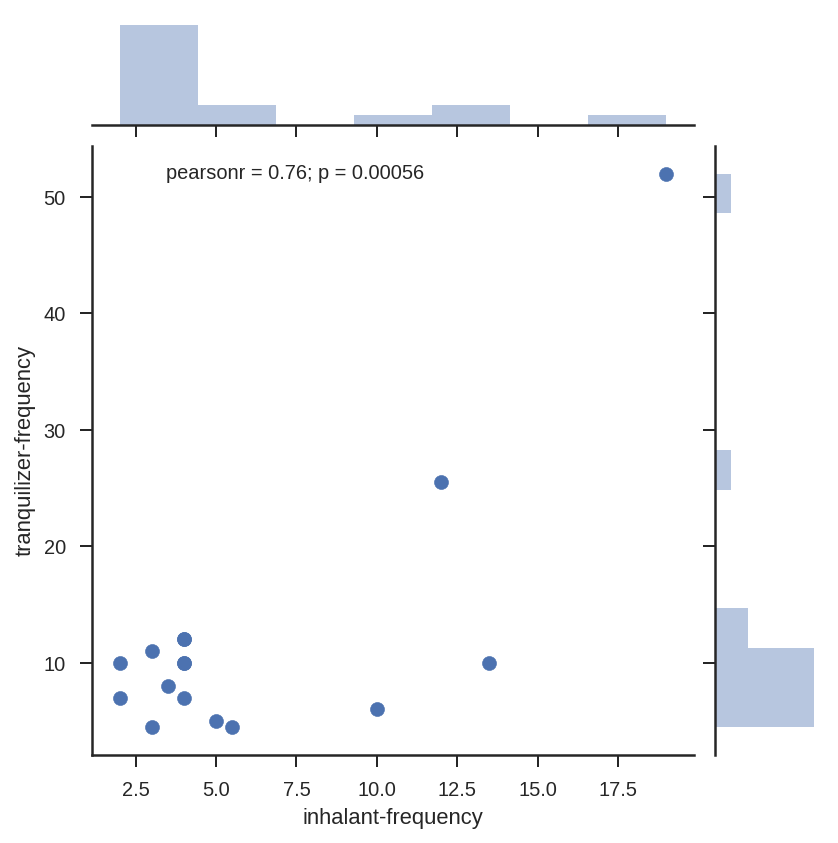

In [80]:
sns.jointplot(x='inhalant-frequency', y='tranquilizer-frequency', data=frequency_df, kind='scatter')
plt.show()

In [81]:
use_df = age_dummies[use_cols]
use_df.head()

,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,...,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,0,0,1,0,0,0,0,0,0,0,...,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,0,0,0,1,0,0,0,0,0,0,...,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,0,0,0,0,1,0,0,0,0,0,...,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


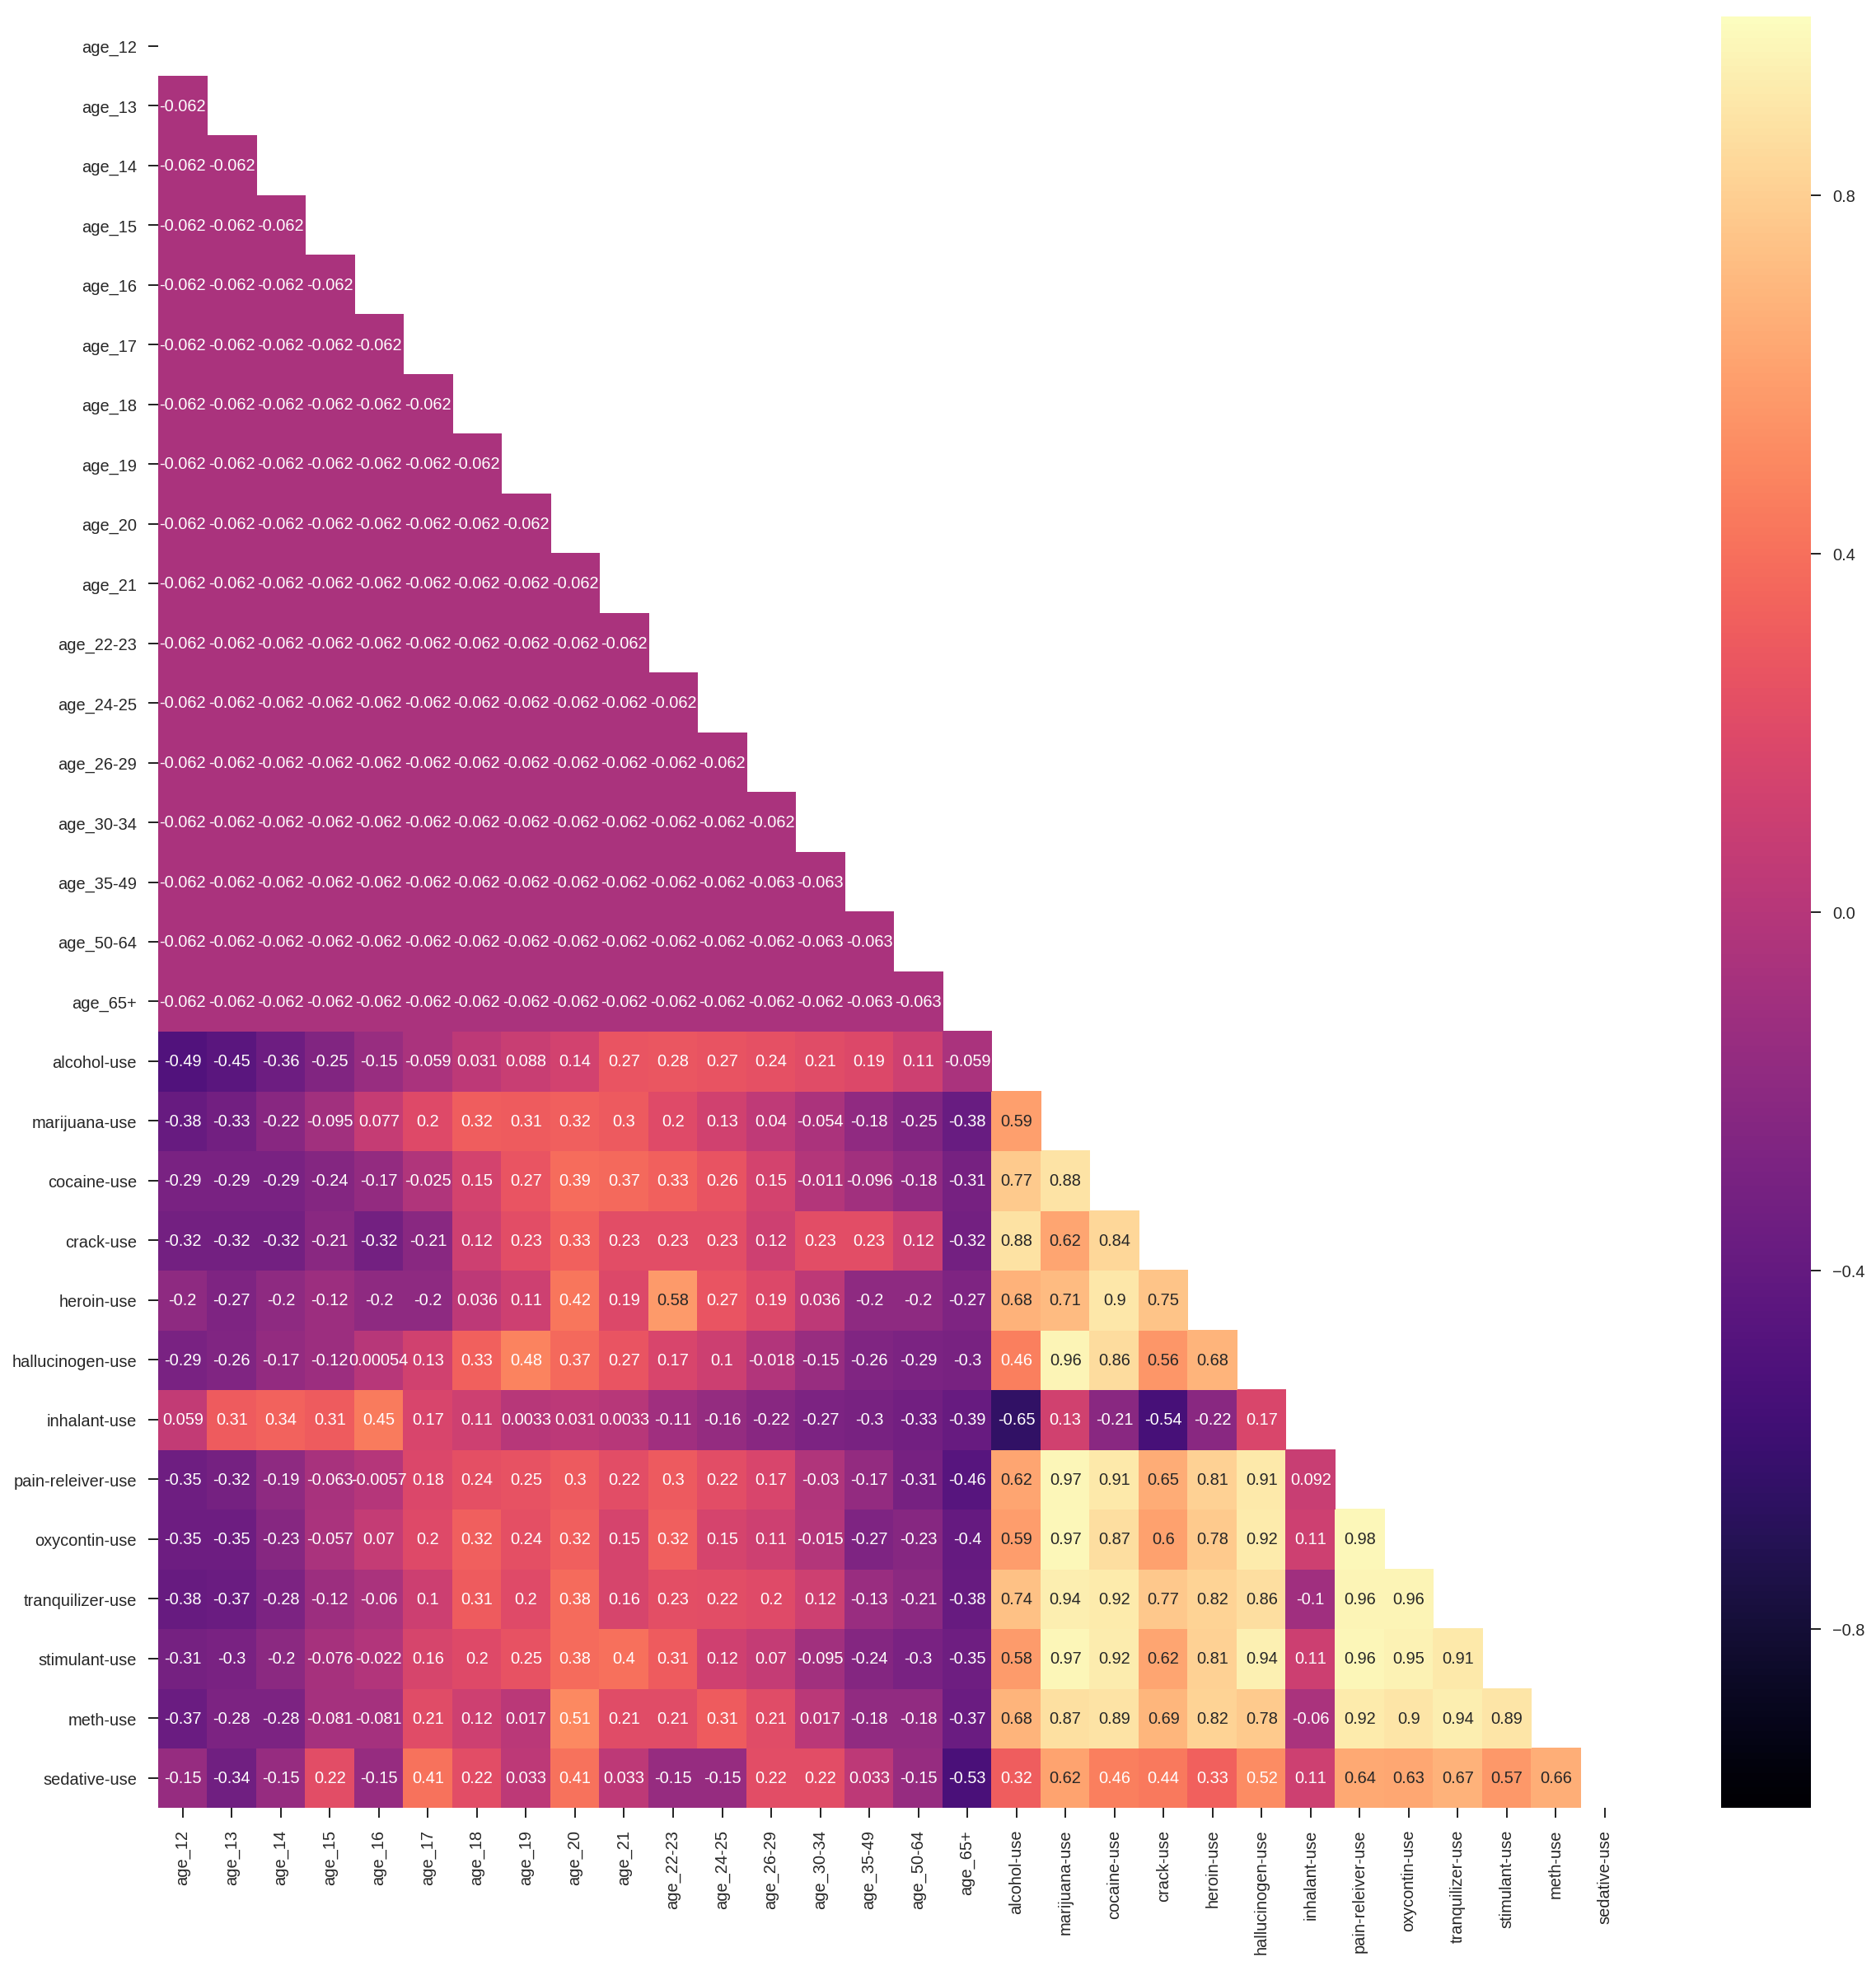

,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,...,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
age_12,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.321465,-0.195293,-0.294755,0.058850,-0.347560,-0.353905,-0.382986,-0.314439,-0.374978,-0.153781
age_13,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.321465,-0.272502,-0.257843,0.308962,-0.315006,-0.353905,-0.368289,-0.296133,-0.276907,-0.340515
age_14,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.321465,-0.195293,-0.165562,0.336752,-0.192929,-0.226798,-0.280108,-0.204601,-0.276907,-0.153781
age_15,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.212167,-0.118084,-0.119422,0.308962,-0.062714,-0.057323,-0.118441,-0.076456,-0.080764,0.219687
age_16,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.321465,-0.195293,0.000543,0.447913,-0.005745,0.069784,-0.059653,-0.021537,-0.080764,-0.153781
age_17,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,-0.062500,...,-0.212167,-0.195293,0.129736,0.170011,0.181440,0.196891,0.102014,0.161527,0.213449,0.406422
age_18,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,-0.062500,...,0.115728,0.036334,0.332753,0.114430,0.238409,0.323997,0.307772,0.198140,0.115378,0.219687
age_19,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,-0.062500,...,0.225026,0.113543,0.480402,0.003269,0.254686,0.239259,0.204893,0.253059,0.017307,0.032953
age_20,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,-0.062500,...,0.334324,0.422378,0.369665,0.031060,0.303516,0.323997,0.381257,0.381204,0.507662,0.406422
age_21,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,1.000000,...,0.225026,0.190752,0.268157,0.003269,0.222132,0.154522,0.160802,0.399510,0.213449,0.032953


In [82]:
sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(20,20)

mask = np.zeros_like(use_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=use_df.corr(), annot=True, ax=ax, cmap='magma', mask=mask)    
plt.show()

df_use_corr = use_df.corr()
df_use_corr

# ** Some relationships worth exploring **
- Heroin vs. Cocaine use
- Inhalant vs. Alcohol use (negatively correlated)
- Marijuana vs. Stimulant use (notably, marijuana is positively correlated with many other drugs)
- Meth vs. Tranquilizer use

- There's increased drug use in the teen years through 30s compared to other age ranges. However whem compared to the frequency, the frequency of drug use is higher in the early teens and age range of 35+. Notably, the median values in the frequncy data could be thrown off by outliers from the sample. Inhalants seem to be the exception where there is a higher percentage of teens (ages 12-18) using inhalants than any other drug type. 



[]

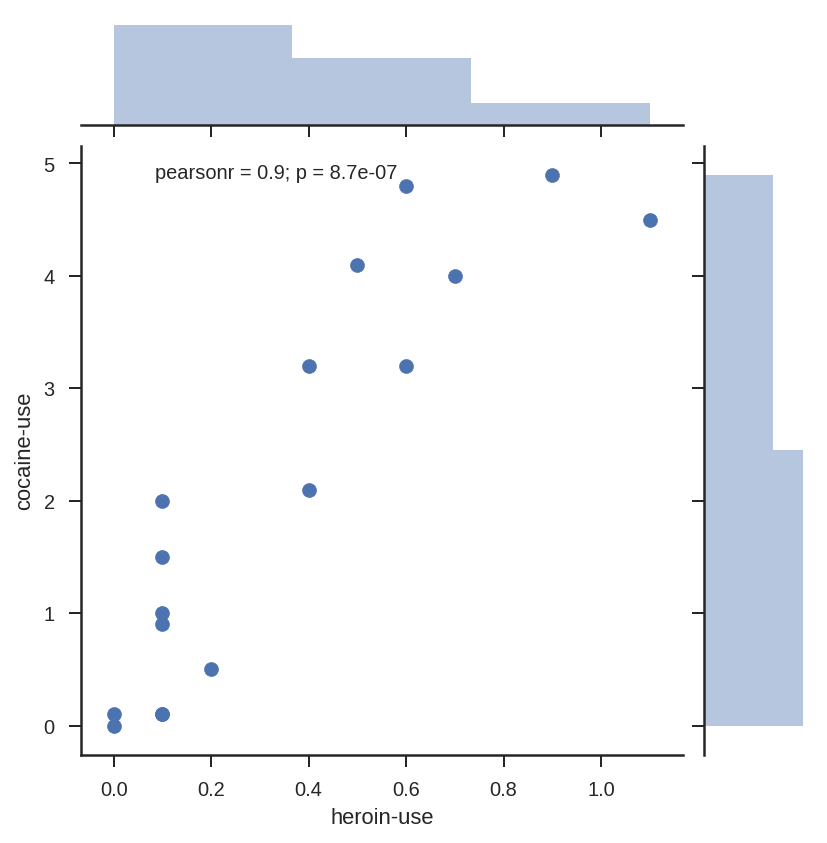

In [83]:
sns.jointplot(x='heroin-use', y='cocaine-use', data = use_df, kind='scatter')
plt.plot()

There is an extremely steep slope (approximately m = 4.5) here. 
Box plot to measure the percentage differences below

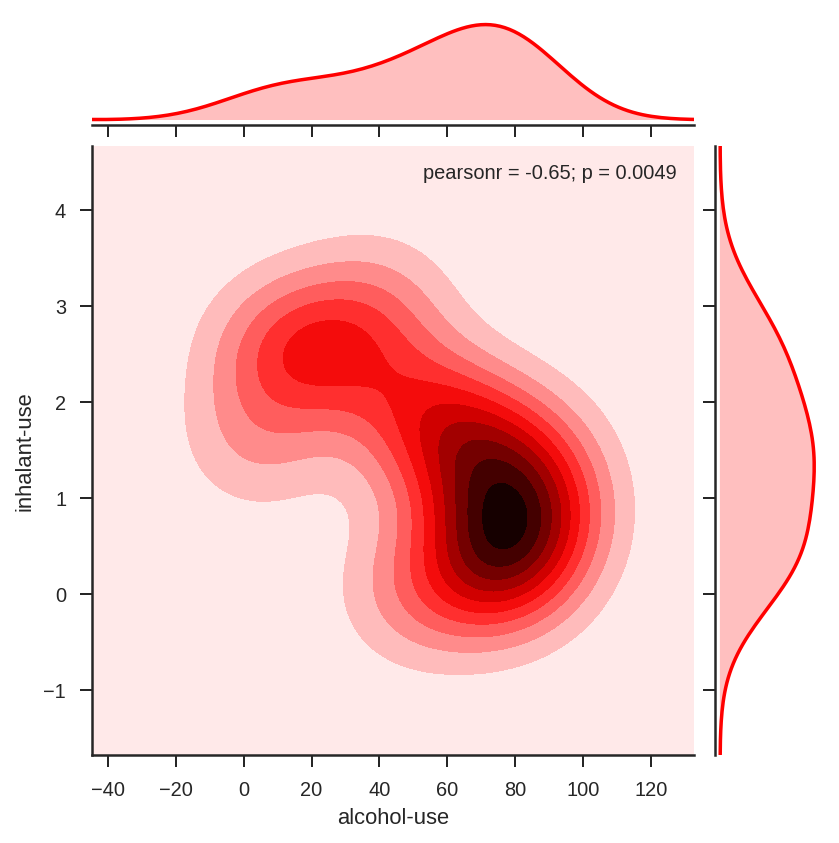

In [84]:
sns.jointplot(x='alcohol-use', y='inhalant-use', data=use_df, kind='kde', color='r')
plt.show()

**NOTES** 
The negative correlation is evident as seen by the decrease in inhalant-use as alcohol-use increases.
Notably, both of the axes are values expressed as percentages.


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

# **QUESTION AND DELIVERABLES**


**QUESTION**
- Are Meth and Heroine frequency or use tightly correlated?

**DELIVERABLES**
- Display a correlation matrix
- Calculate a t-statistic
- Derive a p-value
- Determine whether to accept or reject the null hypothesis
- Make any recommendations should any emerge to the mayor when he/she returns from the Bahamas.

**HYPOTHESES**
- Null Hypothesis: no difference in the average frequency for Meth and average frequency for Heroin
- Alternate Hypothesis: there is a difference


In [85]:
import scipy.stats as stats

In [86]:
nanmean_meth = np.nanmean(df_frequency_only['meth-frequency'])

In [87]:
clean_meth = df_frequency_only['meth-frequency'].mask(df_frequency_only['meth-frequency'].isnull(), nanmean_meth)
clean_meth

0      35.966667
1       5.000000
2      24.000000
3      10.500000
4      36.000000
5      48.000000
6      12.000000
7     105.000000
8      12.000000
9       2.000000
10     46.000000
11     21.000000
12     30.000000
13     54.000000
14    104.000000
15     30.000000
16     35.966667
Name: meth-frequency, dtype: float64

In [88]:
nanmean_heroin = np.nanmean(df_frequency_only['heroin-frequency'])
nanmean_heroin

73.28125

In [89]:
clean_heroin = df_frequency_only['heroin-frequency'].mask(df_frequency_only['heroin-frequency'].isnull(), nanmean_heroin)
clean_heroin

0      35.50000
1      73.28125
2       2.00000
3       1.00000
4      66.50000
5      64.00000
6      46.00000
7     180.00000
8      45.00000
9      30.00000
10     57.50000
11     88.00000
12     50.00000
13     66.00000
14    280.00000
15     41.00000
16    120.00000
Name: heroin-frequency, dtype: float64

In [90]:
meth = df_frequency_only['meth-frequency']
heroin = df_frequency_only['heroin-frequency' ]

In [91]:
np.mean(clean_meth)

35.966666666666669

In [92]:
np.mean(clean_heroin)

73.28125

In [93]:
mean_diff = np.mean(clean_meth)-np.mean(clean_heroin)
mean_diff

-37.314583333333331

In [94]:
array_meth = np.array(clean_meth)
array_heroin = np.array(clean_heroin)

In [95]:
stats.ttest_ind(clean_meth, clean_heroin)

Ttest_indResult(statistic=-2.0745074861873443, pvalue=0.046157184608891566)

# **RESPONSE**

Because p=0.046, which is < 0.05, it is considered statistically significant, therefore it suggests that we should reject the null hypothesis that there is no difference in average heroin and average meth use. While meth and heroin frequency are positively correlated (pearson correlation score of 0.87), the average frequency is not the same. Another observation is that meth and heroin usage increase at age 19 (index 7) and age-range 35-49 (index 14). Given more data, this might be something worth further exploring. 

My recommendaiton to the major would be to explore these two age groups more closely and collect more data. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.